# __Analysis and Simulation of Bus Bunching__

Analysis and mathematical modeling, dedicated to the exploration of novel mechanisms to obtain the greatest benefit from the ever-growing amount of data generated in public transportation while dealing with signific, complex, noise and missing data.

Bus transportation systems in metropolis, such as São Paulo, are complex systems that constantly interacts with city dynamics. Understanding the behavior of this system under different contexts, such as day of the week, time of the day and holidays is vital for a better planning of bus transportation systems. This research proposes an approach to solving the problem that uses data generated by multiple sensors in-vehicle to directly counteract the cause of the bus bunching.

Data Base reference date from __2017-01-01__ until __2017-09-30__. 

272 days can be converted to one of these units:

    23.500.800 seconds
    391.680 minutes
    6528 hours
    272 days
    38 weeks and 6 days
    74,52% of 2017
    
__processar na maquina da federal__    

* nohup python -u < file > &
    
* tail nohup.out

In [3]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil
from pymongo import MongoClient
import pickle
import seaborn as sns
import bokeh
import folium
import webbrowser
from shapely.geometry import Point, Polygon
import datetime
#import datetime as dt
import matplotlib.dates as md
import time

%matplotlib inline

In [2]:
latitude = -23.63870248774502
longitude = -46.695343900467726
map_675K = folium.Map(location=[latitude, longitude], zoom_start=13)
folium.CircleMarker([-23.689609733095438,-46.77345727770849],color='green',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(18032, 16066)
folium.CircleMarker([-23.68628318749556, -46.77055481875523],color='green',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(16066, 14997)
folium.CircleMarker([-23.683171399269526, -46.76871557818051],color='green',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(14997, 14998)
folium.CircleMarker([-23.680571130689255, -46.76526057729619],color='green',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(14998, 14999)
folium.CircleMarker([-23.6777213667861, -46.76192016390048],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(14999, 16018)
folium.CircleMarker([-23.675529772436324, -46.75646643451084],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(16018, 15784)
folium.CircleMarker([-23.676123755116286, -46.74974082335898],color='red',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(15784, 15785)
folium.CircleMarker([-23.673687480165803, -46.74585534114545],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(15785, 15006)
folium.CircleMarker([-23.672487781984362, -46.74288535508426],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(15006, 15007)
folium.CircleMarker([-23.67096112304264, -46.73991405013386],color='orange',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(15007, 15008)
folium.CircleMarker([-23.669892695174184, -46.7369705718029],color='red',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(15008, 14192)
folium.CircleMarker([-23.66856088697897, -46.73311954376861],color='red',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(14192, 14193)
folium.CircleMarker([-23.667140135601457, -46.72533997804064],color='orange',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(14193, 14194)
folium.CircleMarker([-23.66631234395268, -46.71753151940268],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(14194, 14955)
folium.CircleMarker([-23.66526970590957, -46.71063976307338],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(14955, 15010)
folium.CircleMarker([-23.659384863996063, -46.70525972223886],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(15010, 15011)
folium.CircleMarker([-23.65324523651312, -46.70635517293211],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(15011, 14695)
folium.CircleMarker([-23.650469131180028, -46.70436905773142],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(14695, 14696)
folium.CircleMarker([-23.64686366511044, -46.70186901709655],color='orange',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(14696, 14697)
folium.CircleMarker([-23.64250259764584, -46.69882506050396],color='orange',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(14697, 14698)
folium.CircleMarker([-23.63870248774502, -46.695343900467726],color='orange',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(14698, 14699)
folium.CircleMarker([-23.634895089634398, -46.691642753222155],color='orange',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(14699, 14700)
folium.CircleMarker([-23.63114074550968, -46.68808869566962],color='orange',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(14700, 14701)
folium.CircleMarker([-23.627421607696526, -46.68463051374957],color='red',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(14701, 13751)
folium.CircleMarker([-23.62309375221328, -46.680430350436374],color='orange',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(13751, 13752)
folium.CircleMarker([-23.619401999757017, -46.67696500962723],color='orange',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(13752, 13753)
folium.CircleMarker([-23.617011418741775, -46.674700985023094],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(13753, 13754)
folium.CircleMarker([-23.613319813551286, -46.67123026472163],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(13754, 13755)
folium.CircleMarker([-23.60885684069856, -46.66703270601057],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(13755, 13756)
folium.CircleMarker([-23.604937966180984, -46.66335393143781],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(13756, 13757)
folium.CircleMarker([-23.601141310665803, -46.659824723099064],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(13757, 18033)
folium.CircleMarker([-23.597007025365226, -46.655908435956476],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(18033, 18034)
folium.CircleMarker([-23.596378722121685, -46.65129929250486],color='red',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(18034, 12498)
folium.CircleMarker([-23.596689323678955, -46.64740355836816],color='yellow',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(12498, 12499)
folium.CircleMarker([-23.597013555528715, -46.643709408714315],color='green',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(12499, 18035)
folium.CircleMarker([-23.59753482192534, -46.639852010823034],color='green',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K) #(18035, 18036)
folium.CircleMarker([-23.598472325967524, -46.63757565775048],color='red',fill=True,fill_opacity=0.7, radius = 5).add_to(map_675K)
map_675K


In [ ]:
# Função para inserir elementos no mapa
latitude = -23.63870248774502
longitude = -46.695343900467726
map_675K = folium.Map(location=[latitude, longitude], zoom_start=13)

#Popup deve ser uma string ou um objeto Vega (Visual Elements)
def add_marker(row):
    folium.CircleMarker([-23.598472325967524, -46.63757565775048],color='red',fill=True,fill_opacity=0.7, radius = 5, popup = row['time'].strftime('%H:%M')).add_to(map_675K)

# esta linha roda para um elemento
row = df.iloc[321]
add_marker[row]

#esta linha roda para cada linha do dataframe
df.apply(add_marker, axis = 1)

m

In [334]:
# Função para retornar as tuplas dos mid points da trajetória
# Em bus_id inserir o número da linha no formato '675K-10-0'
def link_tuple(bus_id):
    with open('linesedges.pkl', 'rb') as input_file:
        linesedges = pickle.load(input_file)
    return linesedges[bus_id]

In [336]:
link_tuple('675K-10-0')

[(18032, 16066),
 (16066, 14997),
 (14997, 14998),
 (14998, 14999),
 (14999, 16018),
 (16018, 15784),
 (15784, 15785),
 (15785, 15006),
 (15006, 15007),
 (15007, 15008),
 (15008, 14192),
 (14192, 14193),
 (14193, 14194),
 (14194, 14955),
 (14955, 15010),
 (15010, 15011),
 (15011, 14695),
 (14695, 14696),
 (14696, 14697),
 (14697, 14698),
 (14698, 14699),
 (14699, 14700),
 (14700, 14701),
 (14701, 13751),
 (13751, 13752),
 (13752, 13753),
 (13753, 13754),
 (13754, 13755),
 (13755, 13756),
 (13756, 13757),
 (13757, 18033),
 (18033, 18034),
 (18034, 12498),
 (12498, 12499),
 (12499, 18035),
 (18035, 18036)]

In [436]:
def days_month(month):
    monthlist1 = [1,3,5,7,8,10,12] # monthlist for months with 31 days.
    monthlist2 = [4,6,9,11] ## monthlist for months with 30 days.
    monthlist3 = 2 ## month with month with 28 days.
    
    if month in monthlist1:
        return 5
    elif month in monthlist2:
        return 30
    else:
        return 28

In [437]:
def querylist(bus_id, month):
    
    acc = pd.DataFrame()
    lt = link_tuple(bus_id)
    
    for i in range(1, days_month(month) + 1):
        dateb = dateutil.parser.parse("2017" + "-" + str(month) + "-" + str(i) + "T04:00:00")
        datee = dateutil.parser.parse("2017" + "-" + str(month) + "-" + str(i) + "T23:59:59")
        
        
        for j in range(0, len(lt)):
            q = {'trip_id': bus_id, "aproxlinkstart": {"$gte": dateb, "$lt": datee}, "link": str(lt[j])}
            conn = MongoClient('172.17.163.239')
            select = pd.DataFrame.from_records(conn['linktt']['ltts'].find(q))
            conn.close()            
            
            v = []
            for k in range(0, select.shape[0] - 1):
                v.append(round((select['aproxlinkstart'][k + 1] - select['aproxlinkstart'][k]).total_seconds()))
            
            v.insert(0,0)
            select['headway'] = v
            acc = pd.concat([acc, select])

    return acc

In [438]:
# Query list com shift em vez de mais um for-loop
def querylist1(bus_id, month):
    
    acc = pd.DataFrame()
    lt = link_tuple(bus_id)
    
    for i in range(1, days_month(month) + 1):
        dateb = dateutil.parser.parse("2017" + "-" + str(month) + "-" + str(i) + "T04:00:00")
        datee = dateutil.parser.parse("2017" + "-" + str(month) + "-" + str(i) + "T23:59:59")
        
        
        for j in range(0, len(lt)):
            q = {'trip_id': bus_id, "aproxlinkstart": {"$gte": dateb, "$lt": datee}, "link": str(lt[j])}
            conn = MongoClient('172.17.163.239')
            select = pd.DataFrame.from_records(conn['linktt']['ltts'].find(q))
            conn.close()
            
            select['headway'] = select['aproxlinkstart'] - select['aproxlinkstart'].shift()
            #select['headway'] = (select['aproxlinkstart'] - select['aproxlinkstart'].shift()).dt.total_seconds() total em segundos

            
            acc = pd.concat([acc, select])

    return acc

In [439]:
# Teste de performance das queries
import time
start = time.time()
c = querylist('675K-10-0', 5)
end = time.time()
print(end - start)

14.659990787506104


In [78]:
# Observamos que a query com shift aparentemente possui uma performance melhor
import time
start = time.time()
b = querylist1('675K-10-0', 5)
end = time.time()
print(end - start)

10.120421409606934


### __Análise dos tempos de viagens para cada link__

Foi identificado que para o link _(18032, 16066)_ os valores estavam sempre pŕoximos de 95s. Isso porque na interpolação faltava um ponto e no código pegava a mediana do trecho. Por esta razão, muitos valores ficaram exatamente iguais. Para o modelo optamos por descartar o link _(18032, 16066)_.

In [164]:
# Vamos extrair as tuplas que identificam cada um dos segmentos da linha 675K-10-0
mid_points = link_tuple('675K-10-0')

Média:  95.26345678840903  |  Desvio Padrão:  48.81360844841156


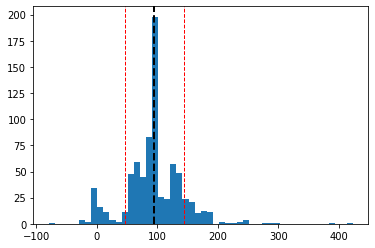

In [175]:
# Para cada link vamos verificar a distribuição dos valores de entrada e saída do link em unidade de tempo (s) e plotar os gráficos
link1 = c[c['link'] == '(18032, 16066)']
print("Média: ", link1['ltt'].mean(), ' | ',"Desvio Padrão: ",link1['ltt'].std())
plt.axvline(link1['ltt'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(link1['ltt'].mean() - link1['ltt'].std(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(link1['ltt'].mean() + link1['ltt'].std(), color='red', linestyle='dashed', linewidth=1)
fig1 = plt.hist(link1['ltt'], 50)
plt.show()

Média:  117.30406529162218  |  Desvio Padrão:  57.12436346853605


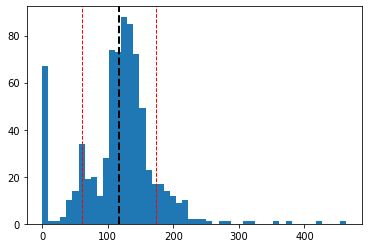

In [148]:
link2 = c[c['link'] == '(16066, 14997)']
print("Média: ", link2['ltt'].mean(), ' | ',"Desvio Padrão: ",link2['ltt'].std())
plt.axvline(link2['ltt'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(link2['ltt'].mean() - link2['ltt'].std(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(link2['ltt'].mean() + link2['ltt'].std(), color='red', linestyle='dashed', linewidth=1)
fig2 = plt.hist(link2['ltt'], 50)
plt.show()

Média:  63.120476290214995  |  Desvio Padrão:  32.93635388752074


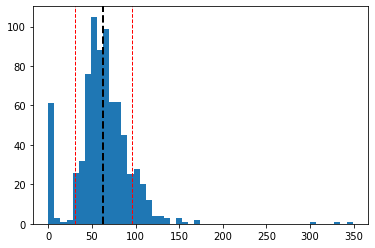

In [127]:
link3 = c[c['link'] == '(14997, 14998)']
print("Média: ", link3['ltt'].mean(), ' | ',"Desvio Padrão: ",link3['ltt'].std())
plt.axvline(link3['ltt'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(link3['ltt'].mean() - link3['ltt'].std(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(link3['ltt'].mean() + link3['ltt'].std(), color='red', linestyle='dashed', linewidth=1)
fig3 = plt.hist(link3['ltt'], 50)
plt.show()

Média:  78.79208570250493  |  Desvio Padrão:  40.405034372308194


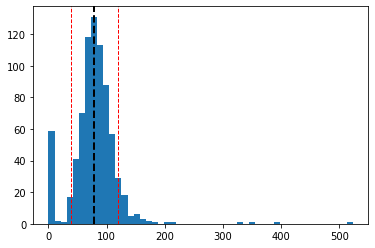

In [129]:
link4 = c[c['link'] == '(14998, 14999)']
print("Média: ", link4['ltt'].mean(), ' | ',"Desvio Padrão: ",link4['ltt'].std())
plt.axvline(link4['ltt'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(link4['ltt'].mean() - link4['ltt'].std(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(link4['ltt'].mean() + link4['ltt'].std(), color='red', linestyle='dashed', linewidth=1)
fig4 = plt.hist(link4['ltt'], 50)
plt.show()

Média:  96.51692990976584  |  Desvio Padrão:  52.468336412875516


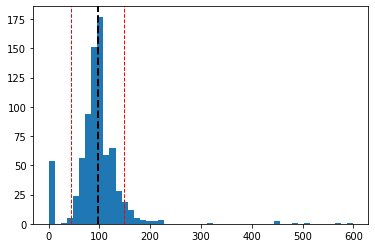

In [135]:
link5 = c[c['link'] == '(14999, 16018)']
print("Média: ", link5['ltt'].mean(), ' | ',"Desvio Padrão: ",link5['ltt'].std())
plt.axvline(link5['ltt'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(link5['ltt'].mean() - link5['ltt'].std(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(link5['ltt'].mean() + link5['ltt'].std(), color='red', linestyle='dashed', linewidth=1)
fig5 = plt.hist(link5['ltt'], 50)
plt.show()

## __Ajuste da base e avaliações dos $\beta$ para cada link da linha 675K-10-0__

__Reunião 8/ago__

Calcular

$c_{(s_{link}),} \beta_{(s_{link}),} H_{(s_{link})}$: para diferentes horários e tipo de dia.

__Teste : Comparar em diferentes dias e horários.__

__Teste 2: Comparar evolução dos _headways_ usando valores médios x valores reais medidos.__

Histórico de seis meses e última hora (hora em hora).

__Exclusões:__

* Segundas, sextas, sábados e domingos,
* Feriados e pontes,
* Mês de julho,
* Excluir setembro para validação.

Verificar a estabilidade do modelo do Daganzo.

In [130]:
with open('675K.pkl', 'rb') as input_file:
    route = pickle.load(input_file)

In [82]:
# fazendo o gráfico de travel time
links = ['(18032, 16066)',
 '(16066, 14997)',
 '(14997, 14998)',
 '(14998, 14999)',
 '(14999, 16018)',
 '(16018, 15784)',
 '(15784, 15785)',
 '(15785, 15006)',
 '(15006, 15007)',
 '(15007, 15008)',
 '(15008, 14192)',
 '(14192, 14193)',
 '(14193, 14194)',
 '(14194, 14955)',
 '(14955, 15010)',
 '(15010, 15011)',
 '(15011, 14695)',
 '(14695, 14696)',
 '(14696, 14697)',
 '(14697, 14698)',
 '(14698, 14699)',
 '(14699, 14700)',
 '(14700, 14701)',
 '(14701, 13751)',
 '(13751, 13752)',
 '(13752, 13753)',
 '(13753, 13754)',
 '(13754, 13755)',
 '(13755, 13756)',
 '(13756, 13757)',
 '(13757, 18033)',
 '(18033, 18034)',
 '(18034, 12498)',
 '(12498, 12499)',
 '(12499, 18035)',
 '(18035, 18036)']

In [83]:
cols = [('ltt', '(18032, 16066)'),
 ('ltt', '(16066, 14997)'),
 ('ltt', '(14997, 14998)'),
 ('ltt', '(14998, 14999)'),
 ('ltt', '(14999, 16018)'),
 ('ltt', '(16018, 15784)'),
 ('ltt', '(15784, 15785)'),
 ('ltt', '(15785, 15006)'),
 ('ltt', '(15006, 15007)'),
 ('ltt', '(15007, 15008)'),
 ('ltt', '(15008, 14192)'),
 ('ltt', '(14192, 14193)'),
 ('ltt', '(14193, 14194)'),
 ('ltt', '(14194, 14955)'),
 ('ltt', '(14955, 15010)'),
 ('ltt', '(15010, 15011)'),
 ('ltt', '(15011, 14695)'),
 ('ltt', '(14695, 14696)'),
 ('ltt', '(14696, 14697)'),
 ('ltt', '(14697, 14698)'),
 ('ltt', '(14698, 14699)'),
 ('ltt', '(14699, 14700)'),
 ('ltt', '(14700, 14701)'),
 ('ltt', '(14701, 13751)'),
 ('ltt', '(13751, 13752)'),
 ('ltt', '(13752, 13753)'),
 ('ltt', '(13753, 13754)'),
 ('ltt', '(13754, 13755)'),
 ('ltt', '(13755, 13756)'),
 ('ltt', '(13756, 13757)'),
 ('ltt', '(13757, 18033)'),
 ('ltt', '(18033, 18034)'),
 ('ltt', '(18034, 12498)'),
 ('ltt', '(12498, 12499)'),
 ('ltt', '(12499, 18035)'),
 ('ltt', '(18035, 18036)')]

In [84]:
mid_distance = [0.2882771770359505,
  0.761446752199638,
  1.1746723009601838,
  1.6314102816954044,
  2.09609427357913,
  2.7356383748447755,
  3.432216475479394,
  3.9176462506293848,
  4.248555850014698,
  4.596560169686359,
  4.920272175120676,
  5.340671146150992,
  6.1640799913309845,
  6.966214586217086,
  7.692604516173864,
  8.667745341684787,
  9.38884027235062,
  9.757381677273159,
  10.231257095527939,
  10.80549925495943,
  11.35820253341392,
  11.925478025110635,
  12.477932225987589,
  13.020438283235872,
  13.666072079649974,
  14.206691515089338,
  14.558123064836078,
  15.099085856376801,
  15.753316355554709,
  16.327373753622037,
  16.88142158917284,
  17.489301299303367,
  18.025755012764414,
  18.424913182269396,
  18.803669139075453,
  19.225077800814674,
  19.564259729210026]

In [85]:
# criando dataframe para os campos distância de cada link, distância acumulada da rota 
mid = []
for i in range(len(mid_distance)-1):
    mid.append(mid_distance[i+1] - mid_distance[i])
m = np.asarray(mid)
m = m.cumsum()
infra = pd.DataFrame(links, columns = ['link'])
infra['mid_distance'] = mid
infra['cumsum'] = m
infra

,link,mid_distance,cumsum
0,"(18032, 16066)",0.473170,0.473170
1,"(16066, 14997)",0.413226,0.886395
2,"(14997, 14998)",0.456738,1.343133
3,"(14998, 14999)",0.464684,1.807817
4,"(14999, 16018)",0.639544,2.447361
5,"(16018, 15784)",0.696578,3.143939
6,"(15784, 15785)",0.485430,3.629369
7,"(15785, 15006)",0.330910,3.960279
8,"(15006, 15007)",0.348004,4.308283
9,"(15007, 15008)",0.323712,4.631995


In [313]:
# Replace specific values in dataframe
df = routeBetas[['new_date', 'travel_id']]
mini = df.groupby('new_date')['travel_id'].min().tolist()

In [137]:
# zerar os Hplans das primeiras viagens do dia
for index, row in routeBetas.iterrows():
    if (row['travel_id'] in mini): #& (row['link'] == '(12498, 12499)')
        routeBetas.loc[index, 'Hplan'] = 0
        #break

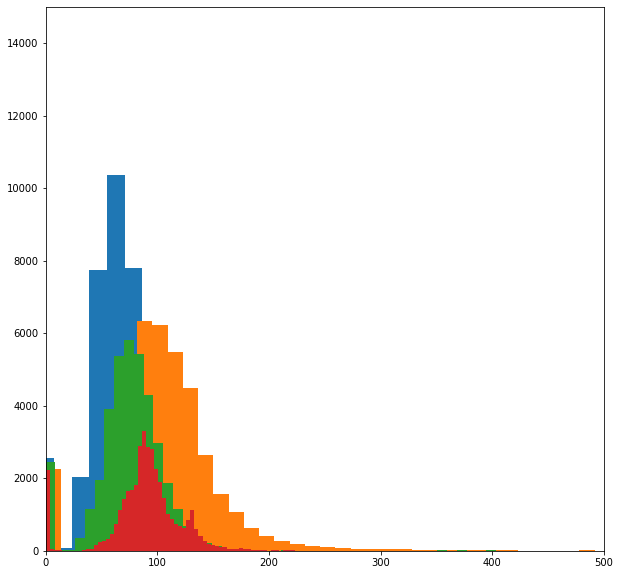

In [391]:
plt.rcParams["figure.figsize"]=10,10
plt.hist(routeBetas[routeBetas['link'] == '(14997, 14998)'].ltt, bins = 300)
plt.axis([0,500, 0, 7000])

plt.rcParams["figure.figsize"]=10,10
plt.hist(routeBetas[routeBetas['link'] == '(16018, 15784)'].ltt, bins = 300)
plt.axis([0,500, 0, 7000])

plt.rcParams["figure.figsize"]=10,10
plt.hist(routeBetas[routeBetas['link'] == '(14998, 14999)'].ltt, bins = 300)
plt.axis([0,500, 0, 7000])

plt.rcParams["figure.figsize"]=10,10
plt.hist(routeBetas[routeBetas['link'] == '(14999, 16018)'].ltt, bins = 300)
plt.axis([0,500, 0, 15000])

plt.show()

In [216]:
pd.to_datetime(routeBetas.loc[(routeBetas['travel_id'] == 1) & (routeBetas['link'] == '(18032, 16066)')]['c_s_hist_mean'], unit='m') + 

1219247   1970-01-01 01:35:11.822343960
Name: c_s_hist_mean, dtype: datetime64[ns]

In [237]:
routeBetas.loc[(routeBetas['travel_id'] == 1) & (routeBetas['link'] == '(18032, 16066)')]['aproxlinkstart']

1219247   2017-01-01 04:15:36
Name: aproxlinkstart, dtype: datetime64[ns]

In [310]:
linhas = list(set(routeBetas['travel_id']))

In [238]:
routeBetas.loc[(routeBetas['travel_id'] == 1) & (routeBetas['link'] == '(18032, 16066)')]['aproxlinkstart'] + pd.to_timedelta(routeBetas['c_s_hist_mean'], unit='s')[0]

1219247   2017-01-01 04:16:43.478777098
Name: aproxlinkstart, dtype: datetime64[ns]

In [242]:
pd.to_timedelta(routeBetas['ltt_acc'], unit='s')[0]

Timedelta('0 days 00:41:23.264962')

In [318]:
#Renumerando as viagens
first_trip = []
for i in linhas:
    if i in mini:
        first_trip.append(False)
    else:
        first_trip.append(True)
        
df2 = pd.DataFrame(first_trip)
df2['travel_id'] = linhas
teste = []
for i in range(len(first_trip)):
    if df2[0][i] == False:
        teste.append(0)
        x = 0
    else:
        teste.append(df2[0][i] + x)
        x += 1

df2['new_travel_id'] = teste
df2.drop(0, axis = 1, inplace= True)
df2.set_index('travel_id', inplace = True)

testenuclear = []
for index, row in routeBetas.iterrows():
    testenuclear.append(df2.loc[row['travel_id'], 'new_travel_id'])
    
routeBetas['new_travel_id'] = testenuclear

In [ ]:
# cs_hist acumulado - mean e median
cscc = routeBetas[['travel_id', 'link','c_s_hist_mean']]
csccm = cscc.groupby(['travel_id']).cumsum()
routeBetas['c_s_hist_mean_cc'] = csccm['c_s_hist_mean'].tolist()

csccmd = routeBetas[['travel_id', 'link','c_s_hist_median']]
csccmmd = csccmd.groupby(['travel_id']).cumsum()
routeBetas['c_s_hist_median_cc'] = csccmmd['c_s_hist_median'].tolist()

In [524]:
# inclusão de coluna para o tempo inicial das viagens (usarei para calcular a viagem ideal)
tmstp = routeBetas[['link','travel_id',  'aproxlinkstart']]
tmstp = tmstp[tmstp['link'] == '(18032, 16066)']
tmstp.set_index('travel_id', inplace= True)
dum = tmstp['travel_id'].tolist()

init = []
for index, row in routeBetas.iterrows():
    if row['travel_id'] in dum:
        init.append(tmstp.loc[row['travel_id'], 'aproxlinkstart'])
    else:
        init.append(np.NaN)
routeBetas['init_time'] = init

In [559]:
# cálculo das trajetórias ideais
# mean
ideal = []
for index, row in routeBetas.iterrows():
    ideal.append(row['init_time'] + pd.to_timedelta(row['c_s_hist_mean_cc'], unit = 's'))
routeBetas['ideal_travel_mean'] = ideal
# median
idealm = []
for index, row in routeBetas.iterrows():
    idealm.append(row['init_time'] + pd.to_timedelta(row['c_s_hist_median_cc'], unit = 's'))
routeBetas['ideal_travel_median'] = idealm

In [571]:
# deslocamento da coluna para ficar correto o tempo de início no nó do link
routeBetas.ideal_travel_mean = routeBetas.ideal_travel_mean.shift(1)
routeBetas.ideal_travel_median = routeBetas.ideal_travel_median.shift(1)

# inserir o valor correto de início da viagem para o travel time planejado
for index, row in routeBetas.iterrows():
    if row['link'] == '(18032, 16066)':
        routeBetas.loc[index, 'ideal_travel_mean'] = row['init_time']  
        
for index, row in routeBetas.iterrows():
    if row['link'] == '(18032, 16066)':
        routeBetas.loc[index, 'ideal_travel_median'] = row['init_time']

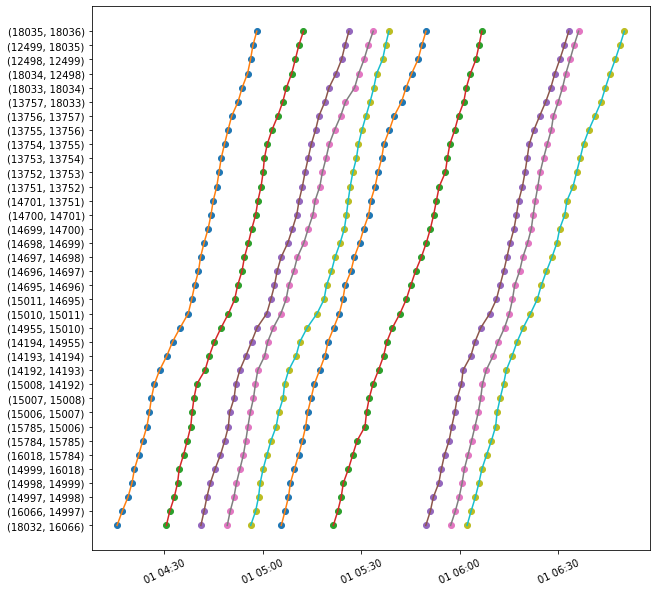

In [606]:
# Plot das viagens da linha 675K

plt.rcParams["figure.figsize"]=10,10
plt.xticks( rotation=25 )

plt.plot_date(routeBetas[routeBetas['travel_id'] == 1].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 1].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 1].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 1].link)

plt.plot_date(routeBetas[routeBetas['travel_id'] == 2].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 2].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 2].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 2].link)

plt.plot_date(routeBetas[routeBetas['travel_id'] == 3].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 3].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 3].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 3].link)

plt.plot_date(routeBetas[routeBetas['travel_id'] == 4].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 4].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 4].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 4].link)

plt.plot_date(routeBetas[routeBetas['travel_id'] == 5].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 5].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 5].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 5].link)

plt.plot_date(routeBetas[routeBetas['travel_id'] == 6].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 6].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 6].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 6].link)

plt.plot_date(routeBetas[routeBetas['travel_id'] == 7].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 7].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 7].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 7].link)

plt.plot_date(routeBetas[routeBetas['travel_id'] == 8].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 8].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 8].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 8].link)

plt.plot_date(routeBetas[routeBetas['travel_id'] == 9].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 9].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 9].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 9].link)

plt.plot_date(routeBetas[routeBetas['travel_id'] == 10].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 10].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 10].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 10].link)

plt.show()

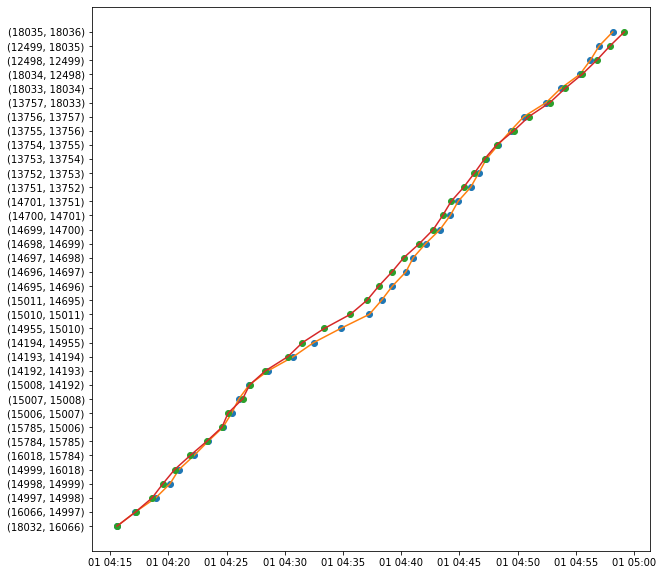

In [607]:
plt.plot_date(routeBetas[routeBetas['travel_id'] == 1].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 1].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 1].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 1].link)

plt.plot_date(routeBetas[routeBetas['travel_id'] == 1].ideal_travel_mean, routeBetas[routeBetas['travel_id'] == 1].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 1].ideal_travel_mean, routeBetas[routeBetas['travel_id'] == 1].link)

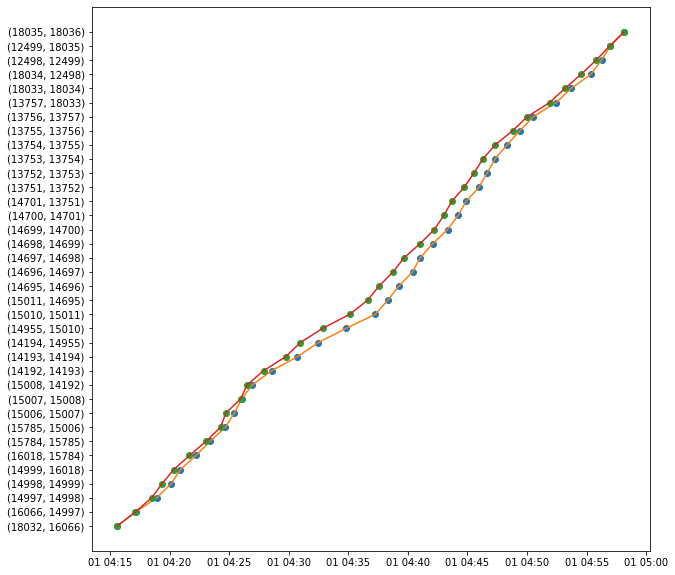

In [608]:
plt.plot_date(routeBetas[routeBetas['travel_id'] == 1].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 1].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 1].aproxlinkstart, routeBetas[routeBetas['travel_id'] == 1].link)

plt.plot_date(routeBetas[routeBetas['travel_id'] == 1].ideal_travel_median, routeBetas[routeBetas['travel_id'] == 1].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 1].ideal_travel_median, routeBetas[routeBetas['travel_id'] == 1].link)

In [610]:
# code to save versions 
with open('routeBetas_v3.pkl', 'rb') as input_file:
    routeBetas = pickle.load(input_file)

In [609]:
# open a file, where you ant to store the data
file = open('routeBetas_v3.pkl', 'wb')
# dump information to that file
pickle.dump(routeBetas, file)
# close the file
file.close()

### __Pré processamento__

In [132]:
# Inclusão do número que representa o dia da semana
# Começando na segunda-feira (Monday = 0, Tuesday = 1, Wednesday = 2,Thursday = 3,  Friday = 4 ,  Saturday = 5, Sunday = 6)
# Inserção de duas colunas de data e horário para manipulação posterior (agrupamento)
route['dayweek'] = route['aproxlinkstart'].dt.dayofweek
route.sort_values(['link','aproxlinkstart'], axis=0,ascending=True, inplace=True)
route['new_date'] = [d.date() for d in route['aproxlinkstart']]
route['new_time'] = [d.time() for d in route['aproxlinkstart']]
#route['headway'] = (route['aproxlinkstart'] - route['aproxlinkstart'].shift()).dt.total_seconds()

In [133]:
# Obtendo os valores de headways no início de viagem.
routeH = route.copy()[route['link'] == '(18032, 16066)']
routeH['Hplan'] = (routeH['aproxlinkstart'] - routeH['aproxlinkstart'].shift()).dt.total_seconds()

### __Cálculo dos $\beta$__

Nesta parte do código estou incluindo todos os valores necessários para o cálculo do $\beta$. De acordo com o artigo de Daganzo, podemos estimar os valores da constante $\beta$ empiricamente a partir dos logs de tempo-distância dos ônibus.

O $\beta$ é um parâmetro adimensional que expressa o incremento marginal no atraso esperado de um determinado ônibus que surge a partir do incremento em uma unidade de headway, isso porque um longo headway resulta adicionalmente num aumento de pssageiros, o que consequentemente atrasa ainda mais o ônibus. O atraso do ônibus depende quase que totalmente do tempo de embarque de passageiros.

Para o cálculo dos $\beta$ uso a seguinte equação que define a lei de movimento estocástico para um ônibus sem controle:

$a_{n, s + 1} \approx a_{n, s} + U_{n,s} = a_{n, s} + c_{s} + \beta_{s}  (a_{n, s} - a_{n, s + 1} - H) + \nu_{n, s+1}$


Variables:

$a_{n, s + 1}$:

$a_{n, s}$: 

$c_{s}$:

$H$:

$\nu_{n, s+1}$:

In [134]:
# inclusão da coluna Hplan dos Headways de início de viagem no dataframe geral
routeHt = routeH[['travel_id', 'Hplan']].fillna(0)
routeHtdict = routeHt.set_index('travel_id')
route = route.join(routeHtdict, on='travel_id')
route.fillna(0, inplace = True)

In [147]:
# verificando se para cada viagem os valores de Hplan são os mesmos e estão corretos
route[route['travel_id'] == 93].head()

,_id,aproxlinkstart,link,ltt,travel_id,trip_id,dayweek,new_date,new_time,Hplan
3345,5c76efcdbd8143570f11e390,2017-01-02 00:59:41.780,"(12498, 12499)",56.824107,93,675K-10-0,0,2017-01-02,00:59:41.780000,5061.0
3346,5c76efcebd8143570f127bcc,2017-01-02 01:00:38.604,"(12499, 18035)",96.483814,93,675K-10-0,0,2017-01-02,01:00:38.604000,5061.0
3336,5c76efcabd8143570f0c8974,2017-01-02 00:50:56.184,"(13751, 13752)",53.100355,93,675K-10-0,0,2017-01-02,00:50:56.184000,5061.0
3337,5c76efcabd8143570f0d21b0,2017-01-02 00:51:49.284,"(13752, 13753)",37.861218,93,675K-10-0,0,2017-01-02,00:51:49.284000,5061.0
3338,5c76efcabd8143570f0db9ec,2017-01-02 00:52:27.146,"(13753, 13754)",35.166099,93,675K-10-0,0,2017-01-02,00:52:27.146000,5061.0


O tipo de movimento descrito na equação é instável, ou seja, a medida que o desvio do headway aumenta em relação ao planejado, os ônibus irão se encontrar.

Como não temos os valores de $\beta$ no início da viagem, usaremos o valor do headway no primeiro link. Esta aproximação é viável, pois de acordo com a tabela I do artigo do Daganzo, a razão entre do RMSE dos desvios da programação $(a_{n,s} - t_{n,s})$ observados no final de cada segmento e o RMSE que teria sido observado no mesmo link se $\beta$ fosse $0$, é igual a $1$ para $\beta < 10^{-1}$.

Para não afetar os valores das médias dos $c_{s hist}$ aplicarei alguns filtros no dataframe. Este passo é importante, pois grande parte dos dados são resultados de interpolações e alguns valores podem estar distorcidos.

O conjunto de filtros da base serão:

* excluir feriados e pontes;

* intervalo das 4AM até 11PM;



In [148]:
# cálculo do c_s histórico (por link, por dia da semana, por hora)
routeAdj = route.copy()
routeAdj.sort_values(['link','aproxlinkstart'], axis=0,ascending=True, inplace=True)

routeAdj.drop(['_id' , 'travel_id', 'trip_id', 'Hplan'], axis = 1, inplace = True)
routeAdj = routeAdj[~((routeAdj['new_time'] <= datetime.time(4,0,0,0)) | (routeAdj['new_time'] >= datetime.time(23,0,0,0)))]
routeAdj = routeAdj[~(routeAdj['new_date'].isin([datetime.date(2017,1,1), datetime.date(2017,1,25), datetime.date(2017,2,27),datetime.date(2017,2,28),
                             datetime.date(2017,3,1), datetime.date(2017,4,14), datetime.date(2017,4,21), datetime.date(2017,5,1),
                             datetime.date(2017,6,15), datetime.date(2017,6,16), datetime.date(2017,7,9), datetime.date(2017,9,7),
                             datetime.date(2017,9,8)]))]
routeAdj = routeAdj[((routeAdj['ltt'] >= 20) & (routeAdj['ltt'] <= 900))]

In [165]:
# calculando média, mediana e desvio padrão
route_mean = routeAdj.groupby(['link', 'dayweek', routeAdj['aproxlinkstart'].dt.hour]).mean()
route_std = routeAdj.groupby(['link', 'dayweek', routeAdj['aproxlinkstart'].dt.hour]).std()
route_median = routeAdj.groupby(['link', 'dayweek', routeAdj['aproxlinkstart'].dt.hour]).median()

In [166]:
route_mean = route_mean.unstack(['link'])
route_median = route_median.unstack(['link'])
route_std = route_std.unstack(['link'])
route_median[cols]
route_std[cols]
route_mean[cols]

ltt                                \
link                   (18032, 16066) (16066, 14997) (14997, 14998)   
dayweek aproxlinkstart                                                
0       4                   98.768186     104.282892      56.955328   
        5                  122.015492     119.241344      72.573106   
        6                  137.157969     133.691491      76.207735   
        7                  127.638400     126.377621      74.640543   
        8                  110.404360     119.615633      73.917906   
        9                  104.406373     134.286216      68.167632   
        10                 106.166154     137.966153      73.100867   
        11                 108.976752     132.526821      74.338020   
        12                 110.125954     138.695369      78.765955   
        13                 111.111258     137.209492      72.789683   
        14                 102.177766     134.022895      72.688187   
        15                  99.887453     127.521463      72.718825   
        16                 102.185652     124.126743      76.072557   
        17                  97.752622     129.369464      76.045192   
        18                 110.466784     132.127681      75.349747   
        19                  96.897642     130.347881      78.195084   
        20                  90.141960     121.894327      69.696437   
        21                  92.421443     119.230796      62.369765   
        22                  88.928588     109.459012      66.388398   
1       4                   97.616464     103.113862      58.139877   
        5                  117.442080     117.906168      71.105658   
        6                  133.017633     131.083748      75.264592   
        7                  131.798642     125.888478      73.774088   
        8                  110.762503     118.492314      74.576658   
        9                  103.733897     137.784446      73.350472   
        10                 107.694986     136.522400      76.367415   
        11                 111.471692     138.896316      74.838973   
        12                 111.958651     139.343985      77.316750   
        13                 104.972109     133.395488      75.332711   
        14                  98.653839     133.208991      71.595413   
...                               ...            ...            ...   
5       12                 113.678205     134.907661      75.972034   
        13                 105.158239     144.225612      75.305738   
        14                  95.402538     127.315707      70.412005   
        15                  93.493129     129.516902      69.969753   
        16                  98.660417     128.158622      76.558907   
        17                  96.773327     136.764176      73.978264   
        18                  98.983547     133.239781      74.341952   
        19                 102.365887     139.707886      74.697857   
        20                  94.453830     127.433041      65.520942   
        21                  91.386683     118.316201      68.075318   
        22                  88.062049     115.212416      64.065034   
6       4                   95.197039      85.515055      55.461073   
        5                   91.160784      89.823419      59.834320   
        6                   90.429783     101.474474      60.311423   
        7                   89.808353     107.827007      63.160097   
        8                   91.397689     112.420161      66.178138   
        9                   91.832526     129.812104      69.493854   
        10                  93.978669     132.843338      66.980461   
        11                 102.094231     133.718598      72.686478   
        12                 115.546329     143.826419      69.828837   
        13                 116.997180     143.606411      71.897195   
        14                  94.879531     133.171112      70.022315   
        15                  94.524010     137.007651      

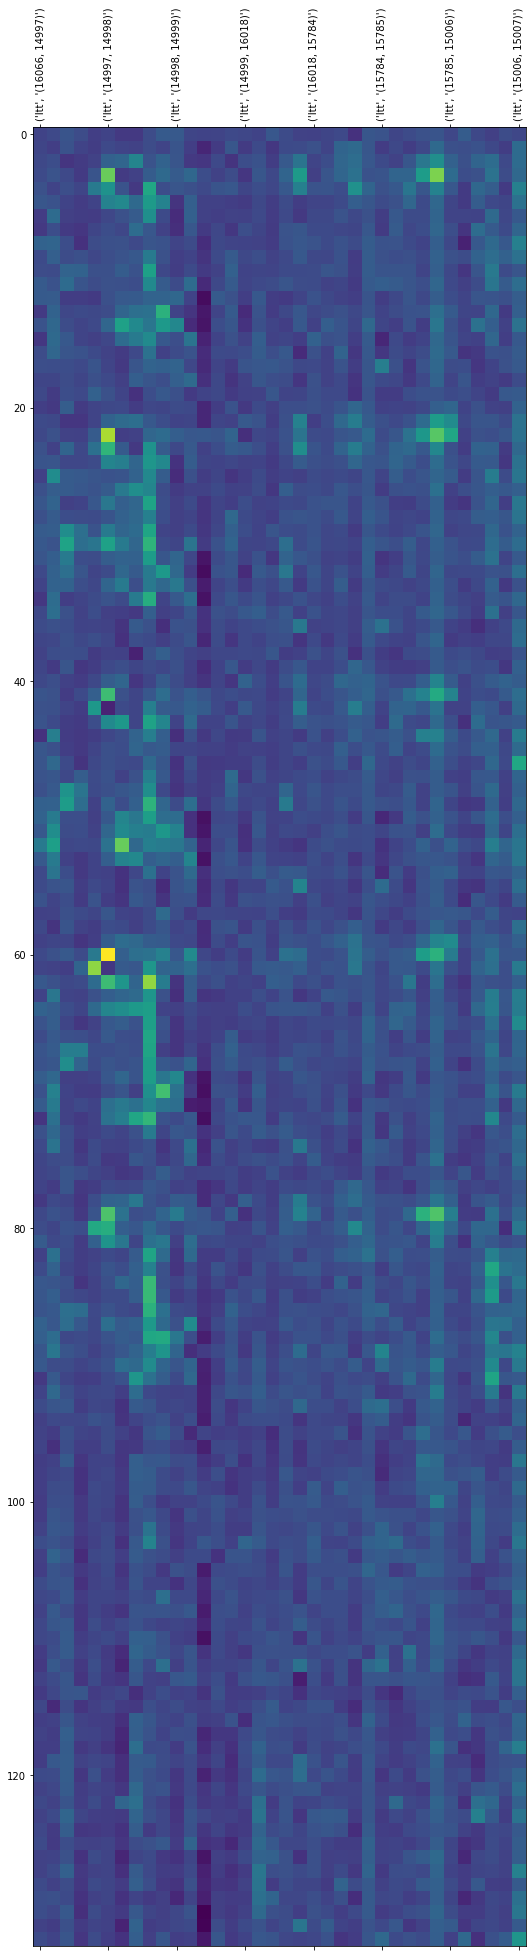

In [167]:
a = route_mean - route_median
a[cols]

import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
%matplotlib inline

gs = gridspec.GridSpec(1, 3)
pl.figure(figsize=(30,100))
ax = pl.subplot(gs[0, 0])
ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(cols, rotation='vertical')
ax.matshow(a)

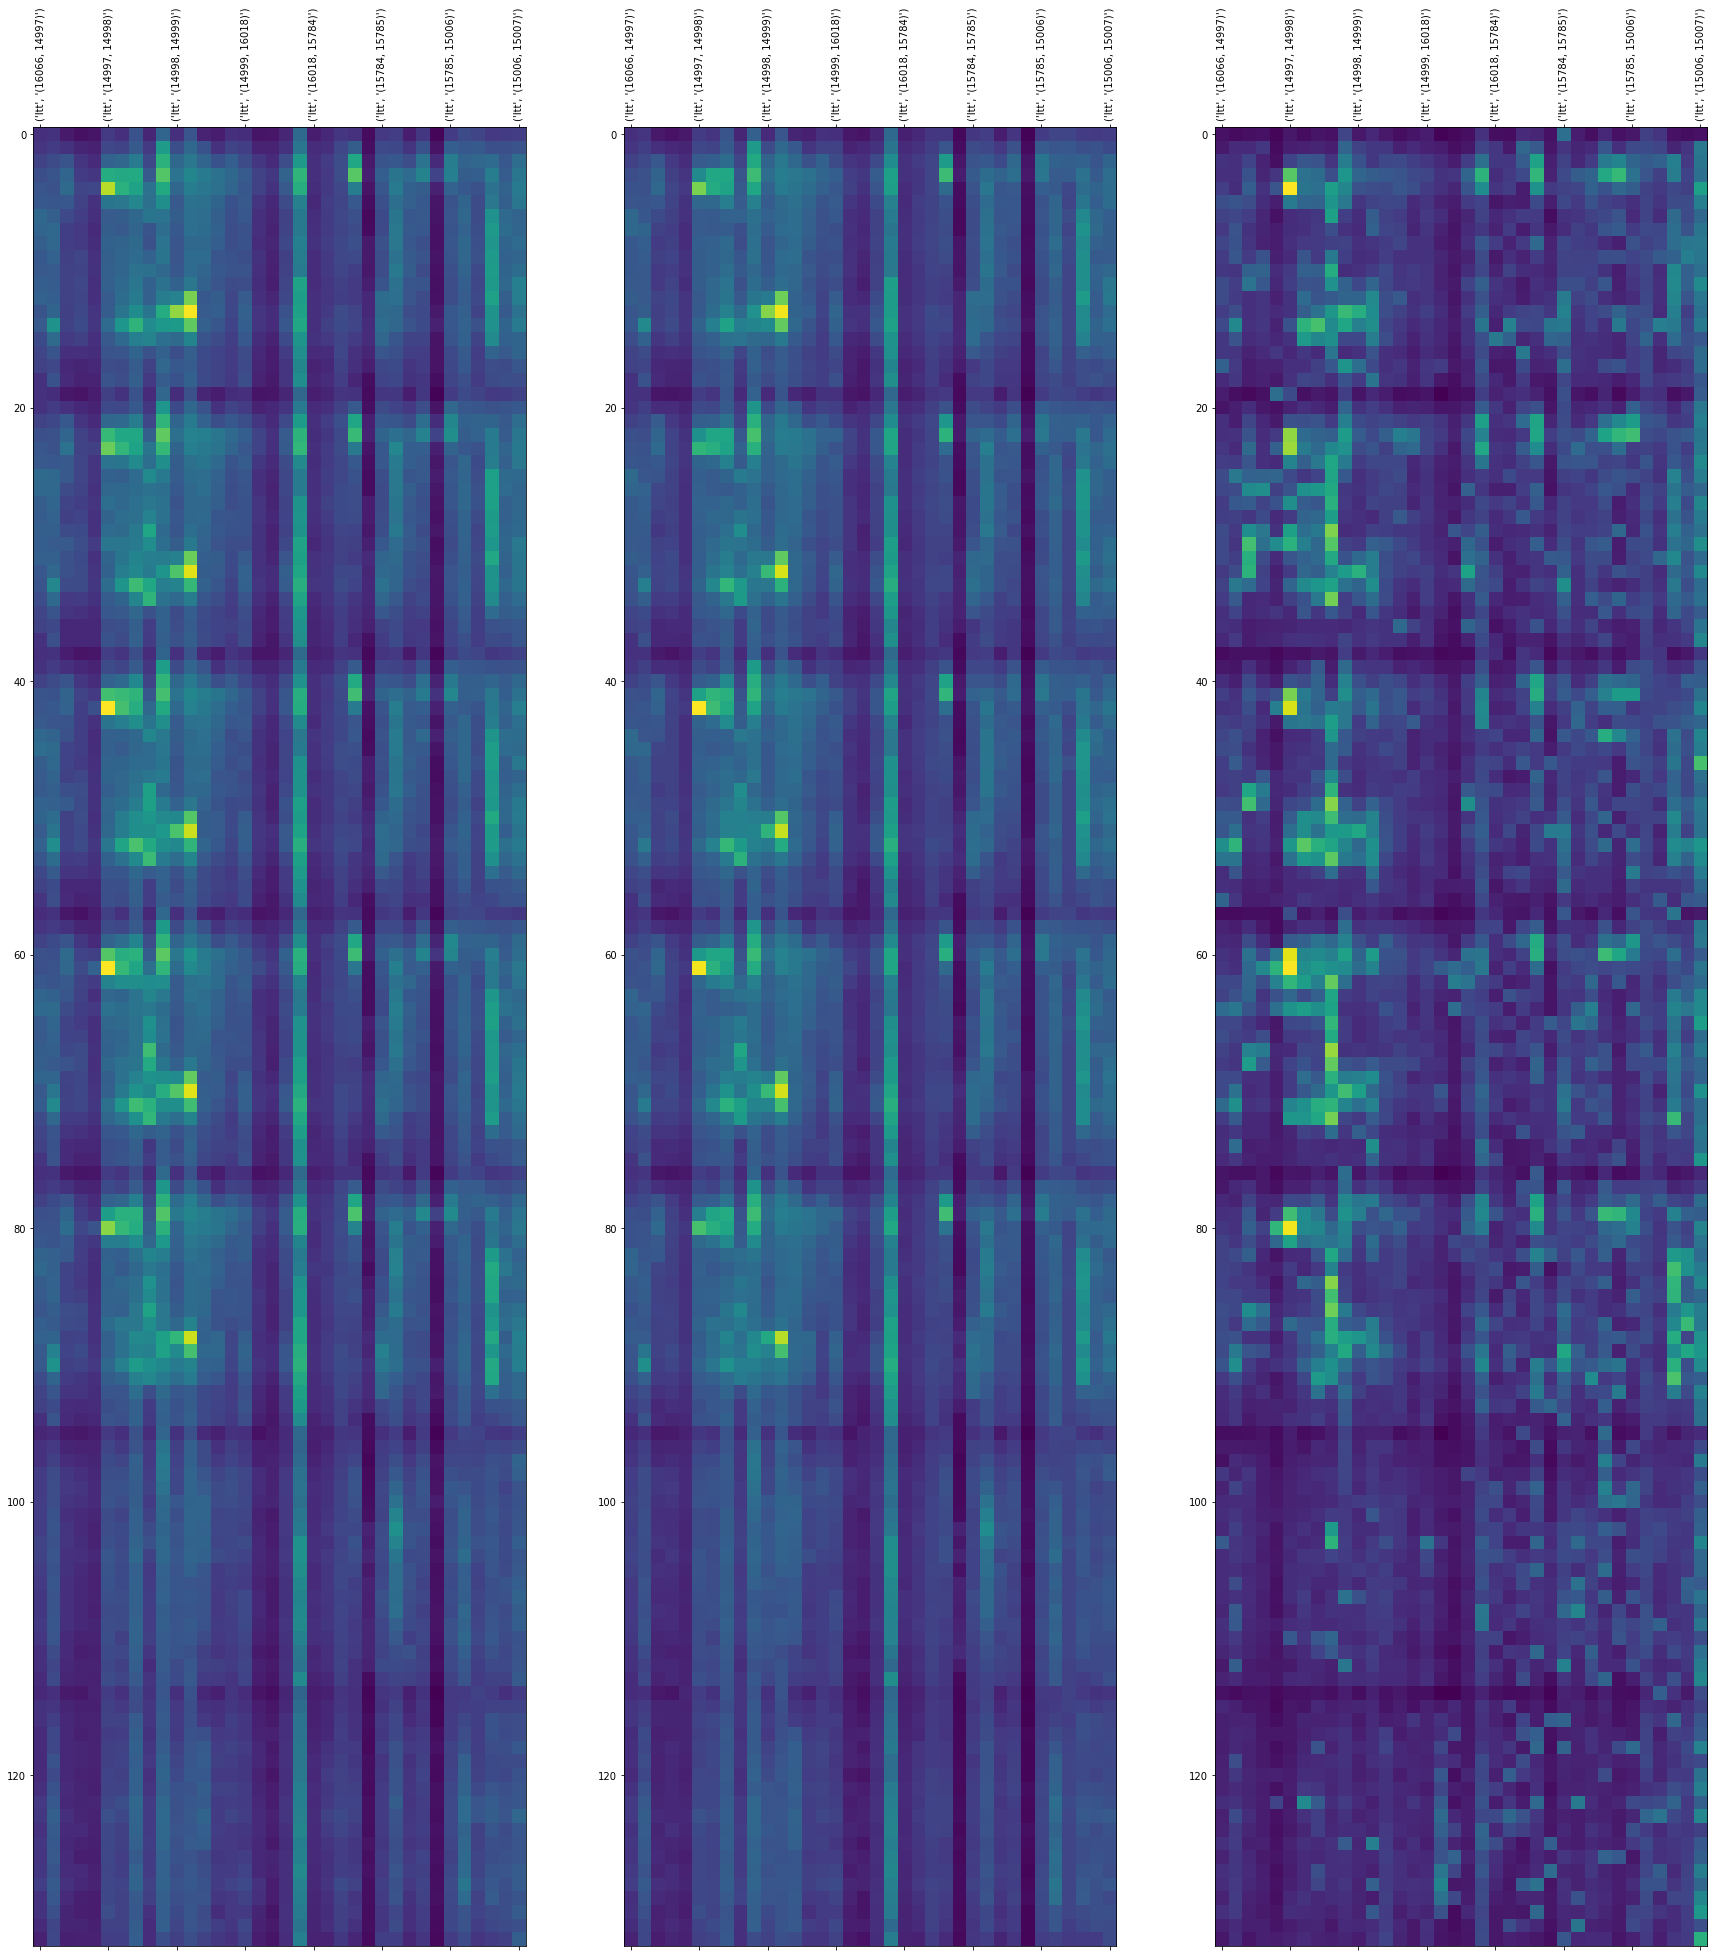

In [168]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
%matplotlib inline

gs = gridspec.GridSpec(1, 3)
pl.figure(figsize=(30,100))

#plot das médias
ax = pl.subplot(gs[0, 0])
ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(cols, rotation='vertical')
ax.matshow(route_mean)

#plot das medianas
ax = pl.subplot(gs[0, 1])
ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(cols, rotation='vertical')
ax.matshow(route_median)

#plot dos desvios
ax = pl.subplot(gs[0, 2])
ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(cols, rotation='vertical')
ax.matshow(route_std)

In [169]:
routeBetas = route.copy()
routeBetas = routeBetas[~((routeBetas['new_time'] <= datetime.time(4,0,0,0)) | (routeBetas['new_time'] >= datetime.time(23,0,0,0)))]
routeBetas['hour'] = [d.hour for d in routeBetas['aproxlinkstart']]

In [177]:
# Inserção dos c_s_hist_mean
c_s = []
for index, row in routeBetas.iterrows():
    c_s.append((route_mean.loc[(row['dayweek'],row['hour'])][('ltt', row['link'])]))
    
routeBetas['c_s_hist_mean'] = c_s
#routeBetas.rename(columns={'c_s_hist':'c_s_hist_mean'},inplace=True)

In [181]:
# Inserção dos c_s_hist_median
c_s_med = []
for index, row in routeBetas.iterrows():
    c_s_med.append((route_median.loc[(row['dayweek'],row['hour'])][('ltt', row['link'])]))
    
routeBetas['c_s_hist_median'] = c_s_med

In [184]:
# Inserção do std
c_s_std = []
for index, row in routeBetas.iterrows():
    c_s_std.append((route_std.loc[(row['dayweek'],row['hour'])][('ltt', row['link'])]))
    
routeBetas['c_s_hist_std'] = c_s_std

In [186]:
# Coeficiente de variação
routeBetas['coef_var'] = routeBetas['c_s_hist_std'] / routeBetas['c_s_hist_mean']

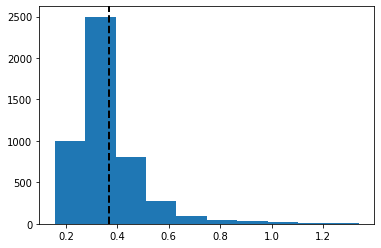

0.36889341335271736

In [197]:
plt.hist(routeBetas['coef_var'].unique())
plt.axvline(routeBetas['coef_var'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()
routeBetas['coef_var'].mean()

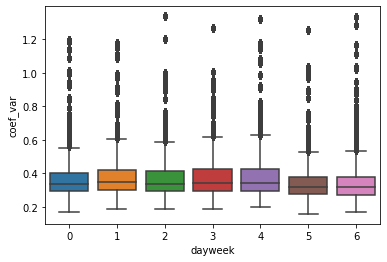

In [199]:
sns.boxplot(x=routeBetas['dayweek'], y=routeBetas['coef_var'])

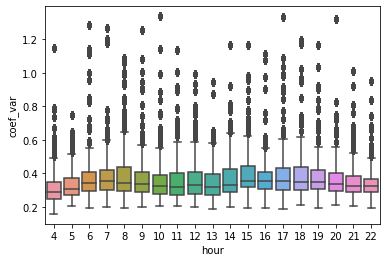

In [200]:
sns.boxplot(x=routeBetas['hour'], y=routeBetas['coef_var'])

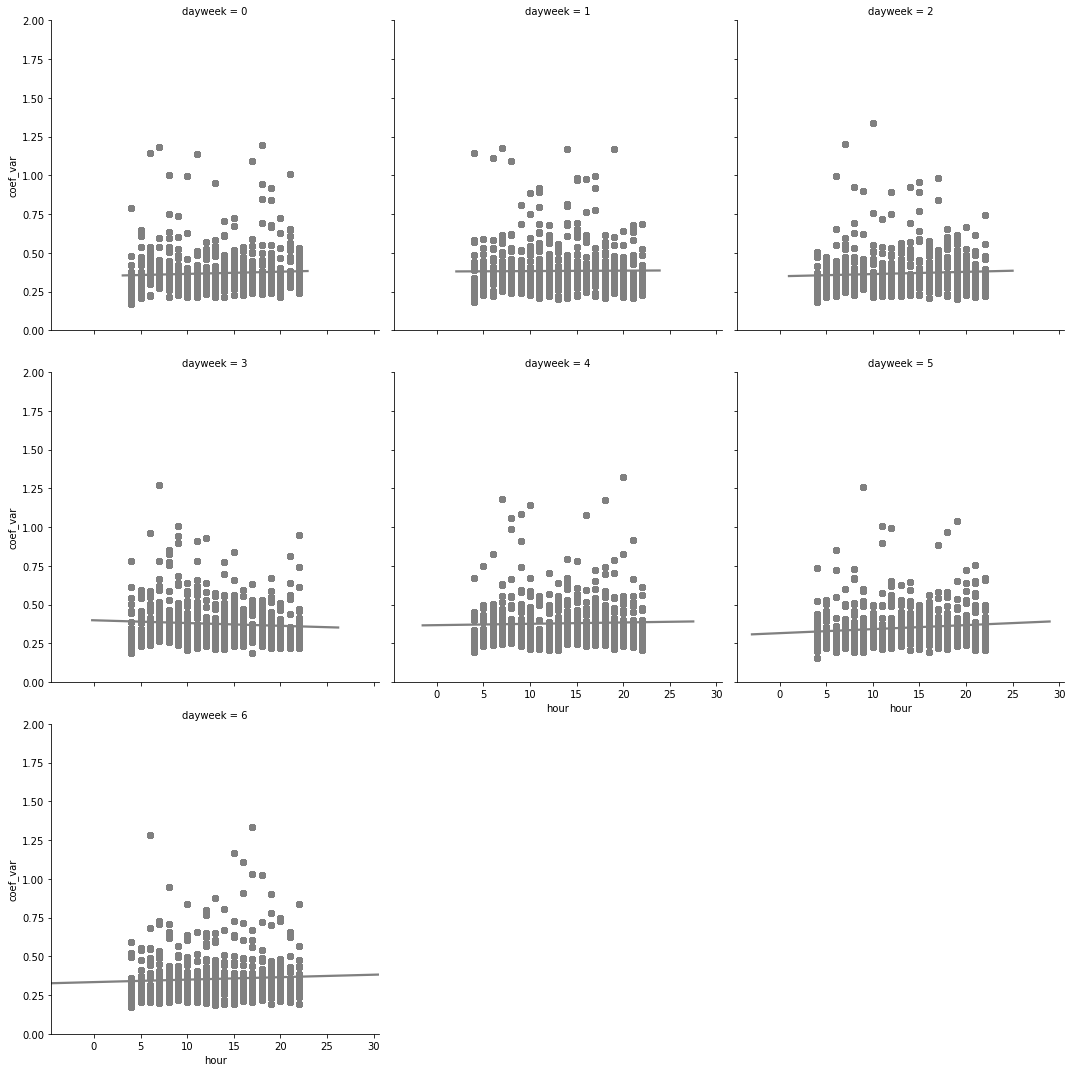

In [242]:
g = sns.FacetGrid(routeBetas, col="dayweek", col_wrap=3, height=5, ylim=(0, 2))
g.map(sns.regplot, "hour", "coef_var", color=".5", ci=None);
#sns.pointplot

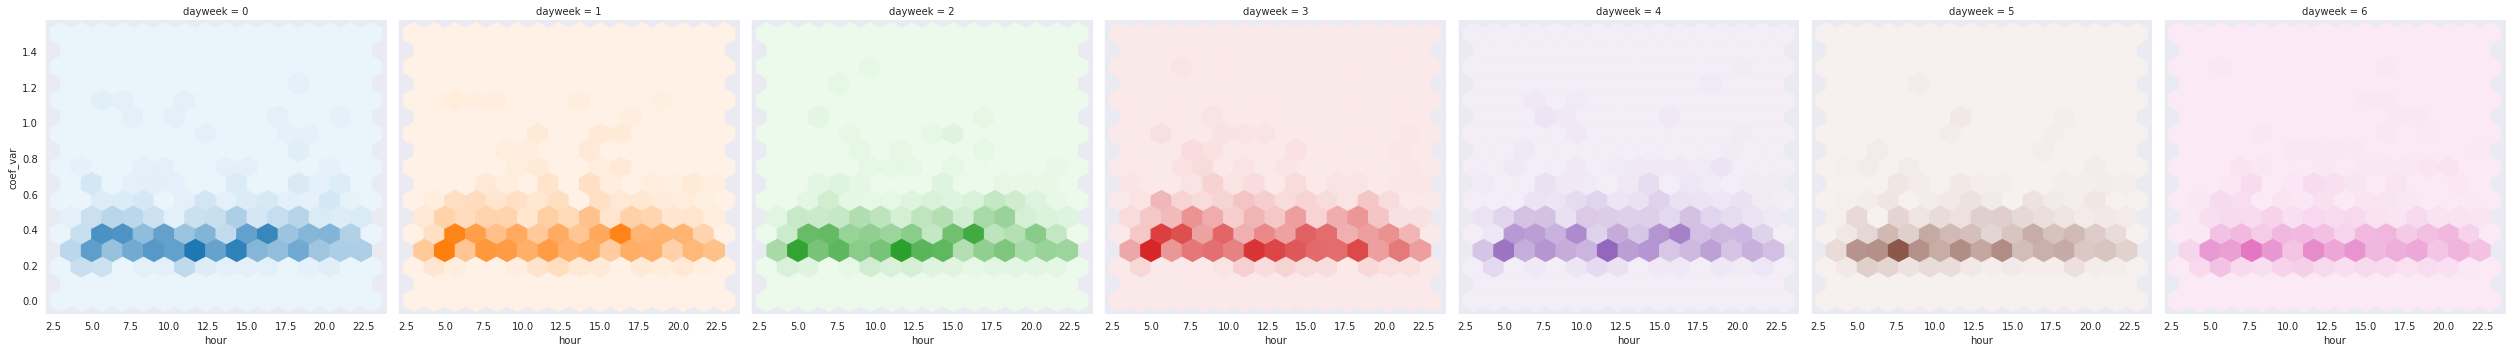

In [234]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(routeBetas, hue="dayweek", col="dayweek", height=5)
g.map(hexbin, "hour", "coef_var",extent=[3, 23, 0, 1.5]);

In [86]:
# mergeando os valores de distância para cada link
routeBetas = pd.merge(routeBetas, infra, on='link')

In [87]:
routeBetas['speed'] = (routeBetas['mid_distance']) / (routeBetas['ltt']/3600) 

In [88]:
routeBetas = routeBetas.replace([np.inf, -np.inf], np.nan)

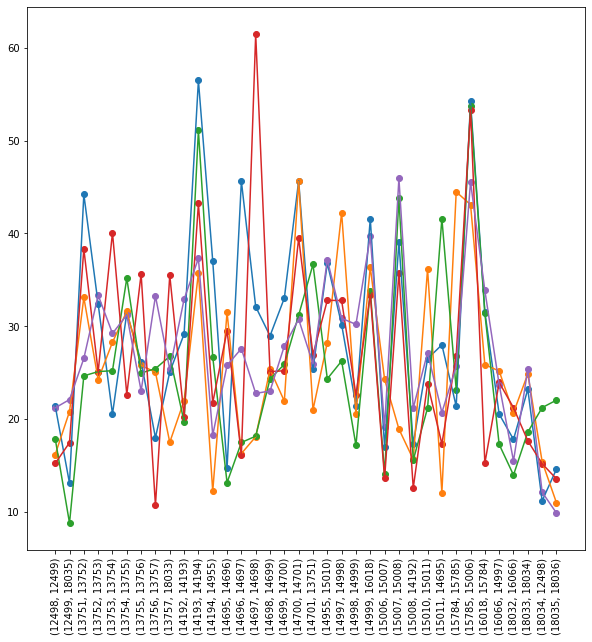

In [89]:
#routeBetas.sort_values(['aproxlinkstart', 'link'], axis = 0, ascending = True, inplace = True)
plt.rcParams["figure.figsize"]=10,10

plt.scatter(routeBetas[routeBetas['travel_id'] == 100].link,routeBetas[routeBetas['travel_id'] == 100].speed)
plt.plot(routeBetas[routeBetas['travel_id'] == 100].link,routeBetas[routeBetas['travel_id'] == 100].speed)

plt.scatter(routeBetas[routeBetas['travel_id'] == 101].link,routeBetas[routeBetas['travel_id'] == 101].speed)
plt.plot(routeBetas[routeBetas['travel_id'] == 101].link,routeBetas[routeBetas['travel_id'] == 101].speed)

plt.scatter(routeBetas[routeBetas['travel_id'] == 102].link,routeBetas[routeBetas['travel_id'] == 102].speed)
plt.plot(routeBetas[routeBetas['travel_id'] == 102].link,routeBetas[routeBetas['travel_id'] == 102].speed)

plt.scatter(routeBetas[routeBetas['travel_id'] == 103].link,routeBetas[routeBetas['travel_id'] == 103].speed)
plt.plot(routeBetas[routeBetas['travel_id'] == 103].link,routeBetas[routeBetas['travel_id'] == 103].speed)

plt.scatter(routeBetas[routeBetas['travel_id'] == 104].link,routeBetas[routeBetas['travel_id'] == 104].speed)
plt.plot(routeBetas[routeBetas['travel_id'] == 104].link,routeBetas[routeBetas['travel_id'] == 104].speed)

plt.xticks(rotation=90)
plt.show()

In [97]:
# valores acumulados do ltt
tempo = routeBetas[['travel_id','ltt', 'aproxlinkstart']].copy()
tempo.sort_values(['travel_id', 'aproxlinkstart'], axis = 0, ascending = True, inplace = True)
tempo2 = tempo.groupby('travel_id').cumsum()

tempo3 = tempo2.values.tolist()

routeBetas.sort_values(['travel_id', 'aproxlinkstart'], axis = 0, ascending = True, inplace = True)

flat_list = [item for sublist in tempo3 for item in sublist]

routeBetas['ltt_acc'] = flat_list

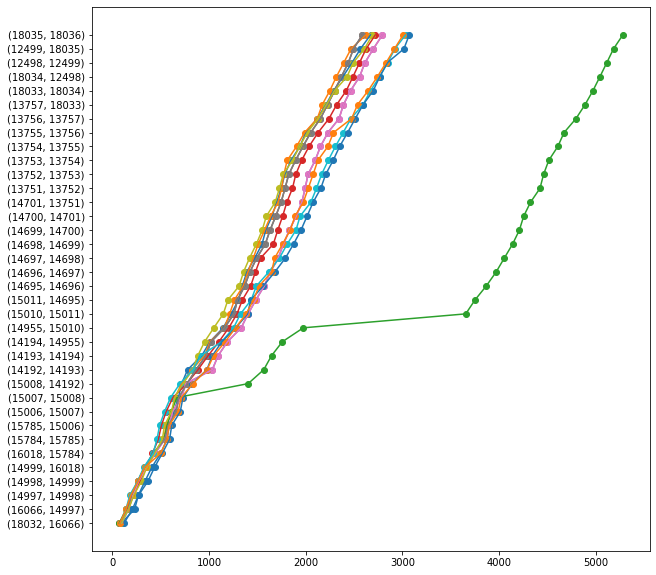

In [169]:
plt.rcParams["figure.figsize"]=10,10

plt.scatter(routeBetas[routeBetas['travel_id'] == 94].ltt_acc, routeBetas[routeBetas['travel_id'] == 94].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 94].ltt_acc, routeBetas[routeBetas['travel_id'] == 94].link)

plt.scatter(routeBetas[routeBetas['travel_id'] == 95].ltt_acc, routeBetas[routeBetas['travel_id'] == 95].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 95].ltt_acc, routeBetas[routeBetas['travel_id'] == 95].link)

plt.scatter(routeBetas[routeBetas['travel_id'] == 96].ltt_acc, routeBetas[routeBetas['travel_id'] == 96].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 96].ltt_acc, routeBetas[routeBetas['travel_id'] == 96].link)

plt.scatter(routeBetas[routeBetas['travel_id'] == 97].ltt_acc, routeBetas[routeBetas['travel_id'] == 97].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 97].ltt_acc, routeBetas[routeBetas['travel_id'] == 97].link)

plt.scatter(routeBetas[routeBetas['travel_id'] == 98].ltt_acc, routeBetas[routeBetas['travel_id'] == 98].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 98].ltt_acc, routeBetas[routeBetas['travel_id'] == 98].link)

plt.scatter(routeBetas[routeBetas['travel_id'] == 99].ltt_acc, routeBetas[routeBetas['travel_id'] == 99].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 99].ltt_acc, routeBetas[routeBetas['travel_id'] == 99].link)

plt.scatter(routeBetas[routeBetas['travel_id'] == 98].ltt_acc, routeBetas[routeBetas['travel_id'] == 98].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 98].ltt_acc, routeBetas[routeBetas['travel_id'] == 98].link)

plt.scatter(routeBetas[routeBetas['travel_id'] == 99].ltt_acc, routeBetas[routeBetas['travel_id'] == 99].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 99].ltt_acc, routeBetas[routeBetas['travel_id'] == 99].link)

plt.scatter(routeBetas[routeBetas['travel_id'] == 100].ltt_acc, routeBetas[routeBetas['travel_id'] == 100].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 100].ltt_acc, routeBetas[routeBetas['travel_id'] == 100].link)

plt.scatter(routeBetas[routeBetas['travel_id'] == 101].ltt_acc, routeBetas[routeBetas['travel_id'] == 101].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 101].ltt_acc, routeBetas[routeBetas['travel_id'] == 101].link)

plt.scatter(routeBetas[routeBetas['travel_id'] == 102].ltt_acc, routeBetas[routeBetas['travel_id'] == 102].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 102].ltt_acc, routeBetas[routeBetas['travel_id'] == 102].link)

plt.scatter(routeBetas[routeBetas['travel_id'] == 103].ltt_acc, routeBetas[routeBetas['travel_id'] == 103].link)
plt.plot(routeBetas[routeBetas['travel_id'] == 103].ltt_acc, routeBetas[routeBetas['travel_id'] == 103].link)

In [ ]:
hd = []
for index, row in route.iterrows():
    if ((row['link'] == '(18032, 16066)') & (row['travel_id'] in mini)):
        hd.append(0)
    else:
        hd.append(row['headway']) 

In [24]:
numerator_hist = []
for index, row in routeBetas.iterrows():
    numerator_hist.append(row['ltt'] - row['c_s_hist'])

routeBetas['numerator_hist'] = numerator_hist

denominator_hist = []
for index, row in routeBetas.iterrows():
    denominator_hist.append(row['headway'] - row['Hplan'])
    
routeBetas['denominator_hist'] = denominator_hist

beta_hist = []
for index, row in routeBetas.iterrows():
    if row['denominator_hist'] == 0:
        beta_hist.append(0)
    else:
        beta_hist.append(row['numerator_hist'] / row['denominator_hist'])

routeBetas['beta_hist'] = beta_hist

routeBetas_hist = routeBetas[routeBetas['beta_hist'] != 0]

In [375]:
routeBetas.head()

,_id,aproxlinkstart,link,ltt,travel_id,trip_id,dayweek,new_date,new_time,Hplan,hour,c_s_hist_mean,c_s_hist_median,c_s_hist_std,coef_var
76,5c76efcdbd8143570f11e334,2017-01-01 04:56:14.719,"(12498, 12499)",44.545392,1,675K-10-0,6,2017-01-01,04:56:14.719000,0.0,4,67.478777,68.267624,17.242833,0.255530
127,5c76efcdbd8143570f11e335,2017-01-01 05:09:53.348,"(12498, 12499)",64.131695,2,675K-10-0,6,2017-01-01,05:09:53.348000,901.0,5,78.543477,76.113184,27.812333,0.354101
175,5c76efcdbd8143570f11e336,2017-01-01 05:23:59.547,"(12498, 12499)",62.108640,3,675K-10-0,6,2017-01-01,05:23:59.547000,631.0,5,78.543477,76.113184,27.812333,0.354101
199,5c76efcdbd8143570f11e337,2017-01-01 05:30:49.503,"(12498, 12499)",77.467221,4,675K-10-0,6,2017-01-01,05:30:49.503000,482.0,5,78.543477,76.113184,27.812333,0.354101
216,5c76efcdbd8143570f11e338,2017-01-01 05:36:28.167,"(12498, 12499)",54.134722,5,675K-10-0,6,2017-01-01,05:36:28.167000,428.0,5,78.543477,76.113184,27.812333,0.354101


In [161]:
routeBetas.sort_values(['travel_id','aproxlinkstart'], axis=0,ascending=True, inplace=True)

In [17]:
#routeBetas['accum'].append(routeBetas['ltt'].cumsum())
#routeBetas[routeBetas['travel_id'] == 2]

lnk = ['(18032, 16066)','(16066, 14997)', '(14997, 14998)']
trvl = [1]


dic = {'travel_id': [1,1,1], 'link': ['(18032, 16066)','(16066, 14997)', '(14997, 14998)'], 'ltt': [1,2,3]}
df = pd.DataFrame(dic)

lista1 = []
for i in trvl:
    lista2 = []
    for j in lnk:
        if j in lista2:
            lista2.append(df.ltt + df.ltt.shift())
        else:
            lista2.append(df.ltt.value())
    lista1.append(lista2)

lista1

AttributeError: 'Series' object has no attribute 'value'

In [32]:
routeBetas_hist = routeBetas[routeBetas['beta_hist'] != 0]

In [94]:
a = routeBetas[(routeBetas['link'] == '(18032, 16066)')]


In [62]:
a = routeBetas_hist[(routeBetas_hist['hour'] == 9) & (routeBetas_hist['dayweek']== 1) & (routeBetas_hist['link'] == '(12498, 12499)')]

In [63]:
a = a[a['beta_hist'] > -100]

In [64]:
a['beta_hist'].min()

-13.790728138245191

In [73]:
b = routeBetas_hist[routeBetas_hist['travel_id'] == 96]
b = b.sort_values(['aproxlinkstart'])
b['ltt'].cumsum()

3366      68.338451
3369     130.461973
3371     212.271868
3374     279.406668
3378     354.873486
3381     461.150471
3386     492.759530
3388     535.947418
3391     594.971400
3394    1331.604934
3446    1492.981239
3464    1573.029851
3473    1684.690331
3481    1901.660885
3505    3581.188480
3710    3677.183675
3719    3793.449488
3733    3895.089284
3742    3980.145152
3750    4065.359927
3759    4135.524260
3767    4180.256179
3771    4250.848689
3778    4348.968175
3789    4385.885663
3792    4439.389817
3795    4533.216478
3806    4598.136047
3813    4721.172469
3825    4814.876853
3834    4896.330912
3842    4968.437185
3849    5039.179378
3856    5109.102361
3861    5205.653011
Name: ltt, dtype: float64

In [83]:
b = routeBetas_hist[[routeBetas_hist['travel_id'] == 96]]
b.sort_values(['aproxlinkstart'])

ValueError: Item wrong length 1 instead of 1285607.

In [86]:
travel = routeBetas_hist['travel_id'].unique().tolist()


In [119]:
b = routeBetas_hist[(routeBetas_hist['hour'] == 4) & (routeBetas_hist['dayweek'] == 0) & (routeBetas_hist['link'] == '(14701, 13751)')]
#b.sort_values(['aproxlinkstart'])

#pd.DataFrame.hist(b[['beta_hist']], bins = 50)
c = b[(b['beta_hist'] < 0)]
#plt.hist(c['beta_hist'], bins = 10)
c

,_id,aproxlinkstart,link,ltt,travel_id,trip_id,dayweek,new_date,new_time,headway,Hplan,hour,c_s_hist,numerator_hist,denominator_hist,beta_hist
3415,5c76efc9bd8143570f0bf139,2017-01-02 04:37:12.480,"(14701, 13751)",4.945091e+01,94,675K-10-0,0,2017-01-02,04:37:12.480000,13641.147,13305.0,4,65.578567,-16.127654,336.147,-0.047978
3445,5c76efc9bd8143570f0bf13a,2017-01-02 04:43:39.512,"(14701, 13751)",7.642923e+01,95,675K-10-0,0,2017-01-02,04:43:39.512000,387.032,400.0,4,65.578567,10.850665,-12.968,-0.836726
3517,5c76efc9bd8143570f0bf13c,2017-01-02 04:55:51.072,"(14701, 13751)",4.344726e+01,97,675K-10-0,0,2017-01-02,04:55:51.072000,731.560,349.0,4,65.578567,-22.131305,382.560,-0.057851
38751,5c76efc9bd8143570f0bf50f,2017-01-09 04:40:33.359,"(14701, 13751)",5.394823e+01,1076,675K-10-0,0,2017-01-09,04:40:33.359000,288.192,228.0,4,65.578567,-11.630337,60.192,-0.193221
38791,5c76efc9bd8143570f0bf510,2017-01-09 04:49:16.989,"(14701, 13751)",6.509440e+01,1077,675K-10-0,0,2017-01-09,04:49:16.989000,523.630,406.0,4,65.578567,-0.484164,117.630,-0.004116
74409,5c76efc9bd8143570f0bf8ed,2017-01-16 04:40:34.946,"(14701, 13751)",5.142258e+01,2066,675K-10-0,0,2017-01-16,04:40:34.946000,13780.695,13349.0,4,65.578567,-14.155990,431.695,-0.032792
74462,5c76efc9bd8143570f0bf8ef,2017-01-16 04:50:15.727,"(14701, 13751)",5.777316e+01,2068,675K-10-0,0,2017-01-16,04:50:15.727000,522.636,358.0,4,65.578567,-7.805407,164.636,-0.047410
111523,5c76efc9bd8143570f0bfcf6,2017-01-23 04:21:25.056,"(14701, 13751)",2.928610e-03,3099,675K-10-0,0,2017-01-23,04:21:25.056000,12975.539,585.0,4,65.578567,-65.575639,12390.539,-0.005292
111649,5c76efc9bd8143570f0bfcfc,2017-01-23 04:56:01.000,"(14701, 13751)",1.914909e-14,3105,675K-10-0,0,2017-01-23,04:56:01,1048.529,331.0,4,65.578567,-65.578567,717.529,-0.091395
145647,5c76efc9bd8143570f0c00a8,2017-01-30 04:40:40.044,"(14701, 13751)",6.312615e+01,4045,675K-10-0,0,2017-01-30,04:40:40.044000,15188.005,13644.0,4,65.578567,-2.452414,1544.005,-0.001588


In [1]:
plt.figure(figsize=(20,10))
plt.hist(a['beta_hist'], bins = 50)


NameError: name 'plt' is not defined

In [656]:
a

,_id,aproxlinkstart,link,ltt,travel_id,trip_id,dayweek,new_date,new_time,headway,Hplan,hour,c_s_hist,numerator_hist,denominator_hist,beta_hist
7820,5c76efcdbd8143570f11e409,2017-01-02 18:13:05.948,"(12498, 12499)",85.546022,214,675K-10-0,0,2017-01-02,18:13:05.948000,1509.400,900.0,18,123.906019,-38.359997,609.400,-0.062947
7852,5c76efcdbd8143570f11e40a,2017-01-02 18:27:55.273,"(12498, 12499)",99.069982,215,675K-10-0,0,2017-01-02,18:27:55.273000,889.325,264.0,18,123.906019,-24.836037,625.325,-0.039717
7962,5c76efcdbd8143570f11e40b,2017-01-02 18:59:03.662,"(12498, 12499)",48.251817,216,675K-10-0,0,2017-01-02,18:59:03.662000,1868.389,497.0,18,123.906019,-75.654202,1371.389,-0.055166
43254,5c76efcdbd8143570f11e7e0,2017-01-09 18:09:43.379,"(12498, 12499)",53.977420,1197,675K-10-0,0,2017-01-09,18:09:43.379000,702.504,462.0,18,123.906019,-69.928599,240.504,-0.290759
43257,5c76efcdbd8143570f11e7e1,2017-01-09 18:10:05.992,"(12498, 12499)",119.539017,1198,675K-10-0,0,2017-01-09,18:10:05.992000,22.613,72.0,18,123.906019,-4.367002,-49.387,0.088424
43288,5c76efcdbd8143570f11e7e2,2017-01-09 18:17:39.151,"(12498, 12499)",67.899850,1199,675K-10-0,0,2017-01-09,18:17:39.151000,453.159,365.0,18,123.906019,-56.006168,88.159,-0.635286
43362,5c76efcdbd8143570f11e7e4,2017-01-09 18:33:57.933,"(12498, 12499)",76.544866,1201,675K-10-0,0,2017-01-09,18:33:57.933000,978.782,948.0,18,123.906019,-47.361153,30.782,-1.538599
43400,5c76efcdbd8143570f11e7e5,2017-01-09 18:42:45.055,"(12498, 12499)",95.317993,1202,675K-10-0,0,2017-01-09,18:42:45.055000,527.122,482.0,18,123.906019,-28.588025,45.122,-0.633572
43423,5c76efcdbd8143570f11e7e6,2017-01-09 18:47:08.755,"(12498, 12499)",71.280064,1203,675K-10-0,0,2017-01-09,18:47:08.755000,263.700,287.0,18,123.906019,-52.625954,-23.300,2.258625
43445,5c76efcdbd8143570f11e7e7,2017-01-09 18:51:44.540,"(12498, 12499)",117.234467,1204,675K-10-0,0,2017-01-09,18:51:44.540000,275.785,444.0,18,123.906019,-6.671551,-168.215,0.039661


In [547]:
len(numerator_hist)

1324067

In [416]:
route_mean.loc[(0, 4)][('ltt', '(12498, 12499)')]

74.29698867480693

In [520]:
route_mean.loc[(6, 4)][('ltt', '(12498, 12499)')]

67.4787770983779

In [570]:
route

,_id,aproxlinkstart,link,ltt,travel_id,trip_id,dayweek,new_date,new_time,headway,Hplan
76,5c76efcdbd8143570f11e334,2017-01-01 04:56:14.719,"(12498, 12499)",4.454539e+01,1,675K-10-0,6,2017-01-01,04:56:14.719000,NaN,0.0
127,5c76efcdbd8143570f11e335,2017-01-01 05:09:53.348,"(12498, 12499)",6.413170e+01,2,675K-10-0,6,2017-01-01,05:09:53.348000,818.629,901.0
175,5c76efcdbd8143570f11e336,2017-01-01 05:23:59.547,"(12498, 12499)",6.210864e+01,3,675K-10-0,6,2017-01-01,05:23:59.547000,846.199,631.0
199,5c76efcdbd8143570f11e337,2017-01-01 05:30:49.503,"(12498, 12499)",7.746722e+01,4,675K-10-0,6,2017-01-01,05:30:49.503000,409.956,482.0
216,5c76efcdbd8143570f11e338,2017-01-01 05:36:28.167,"(12498, 12499)",5.413472e+01,5,675K-10-0,6,2017-01-01,05:36:28.167000,338.664,428.0
232,5c76efcdbd8143570f11e339,2017-01-01 05:47:16.935,"(12498, 12499)",6.785786e+01,6,675K-10-0,6,2017-01-01,05:47:16.935000,648.768,559.0
274,5c76efcdbd8143570f11e33a,2017-01-01 06:04:54.553,"(12498, 12499)",5.552900e+01,7,675K-10-0,6,2017-01-01,06:04:54.553000,1057.618,951.0
372,5c76efcdbd8143570f11e33b,2017-01-01 06:30:26.527,"(12498, 12499)",8.494688e+01,8,675K-10-0,6,2017-01-01,06:30:26.527000,1531.974,1690.0
388,5c76efcdbd8143570f11e33c,2017-01-01 06:33:33.772,"(12498, 12499)",7.403860e+01,9,675K-10-0,6,2017-01-01,06:33:33.772000,187.245,454.0
444,5c76efcdbd8143570f11e33d,2017-01-01 06:47:21.123,"(12498, 12499)",8.469987e+01,10,675K-10-0,6,2017-01-01,06:47:21.123000,827.351,300.0


In [573]:
(1 - 1285607/1402992) * 100

8.366761891728537

In [433]:
route['aproxlinkstart'][76].hour

4

In [460]:
route['link'][127]

'(12498, 12499)'

In [497]:
route['ltt'][3119]

86.39013223074198

In [461]:
route['ltt'][127]

64.13169523397892

In [466]:
(route['ltt'][3118] - route_mean.loc[(route['dayweek'][127],route['aproxlinkstart'][127].hour)][('ltt', route['link'][127])]) / (route['headway'][127] - route['Hplan'][127])

0.1749618435808972

In [474]:
[(route['ltt'][1] - route_mean.loc[(route['dayweek'][1],route['aproxlinkstart'][1].hour)][('ltt', route['link'][1])]) / (route['headway'][1] - route['Hplan'][1])]

[-8.149767694961374e-07]

In [465]:
route['headway'][127] - route['Hplan'][127]

-82.37099999999998

In [505]:
routeBetas['hour'].min()

4

In [542]:
routeBetas.head()

,_id,aproxlinkstart,link,ltt,travel_id,trip_id,dayweek,new_date,new_time,headway,Hplan,hour,c_s_hist,numerator_hist
76,5c76efcdbd8143570f11e334,2017-01-01 04:56:14.719,"(12498, 12499)",44.545392,1,675K-10-0,6,2017-01-01,04:56:14.719000,NaN,0.0,4,67.478777,1.242636
127,5c76efcdbd8143570f11e335,2017-01-01 05:09:53.348,"(12498, 12499)",64.131695,2,675K-10-0,6,2017-01-01,05:09:53.348000,818.629,901.0,5,78.543477,1.242636
175,5c76efcdbd8143570f11e336,2017-01-01 05:23:59.547,"(12498, 12499)",62.108640,3,675K-10-0,6,2017-01-01,05:23:59.547000,846.199,631.0,5,78.543477,1.242636
199,5c76efcdbd8143570f11e337,2017-01-01 05:30:49.503,"(12498, 12499)",77.467221,4,675K-10-0,6,2017-01-01,05:30:49.503000,409.956,482.0,5,78.543477,1.242636
216,5c76efcdbd8143570f11e338,2017-01-01 05:36:28.167,"(12498, 12499)",54.134722,5,675K-10-0,6,2017-01-01,05:36:28.167000,338.664,428.0,5,78.543477,1.242636


In [543]:
44.545392 - 67.478777

-22.933384999999994

In [538]:
route_mean.loc[(routeBetas['dayweek'][1141],routeBetas['hour'][1141])][('ltt', routeBetas['link'][1141])]

71.14738874371304

In [ ]:
numerator = []
for i in range(len(routeBetas)):
    numerator.append(routeBetas['ltt'][i] - route_mean.loc[(routeBetas['dayweek'][i],routeBetas['aproxlinkstart'][i].hour)][('ltt', routeBetas['link'][i])])
    print(i)

In [ ]:
denominator = []
for i in len(route):
    denominator.append(route['headway'][i] - route['Hplan'][i])

In [ ]:
beta = []
for i in len(route):
    denominator.append((route['ltt'][1] - route_mean.loc[(route['dayweek'][1],route['aproxlinkstart'][1].hour)][('ltt', route['link'][1])]) / (route['headway'][1] - route['Hplan'][1]))

### __Limpeza da base de dados__

In [108]:
route = route[~(route['new_date'].isin([datetime.date(2017,1,1), datetime.date(2017,1,25), datetime.date(2017,2,27),datetime.date(2017,2,28),
                             datetime.date(2017,3,1), datetime.date(2017,4,14), datetime.date(2017,4,21), datetime.date(2017,5,1),
                             datetime.date(2017,6,15), datetime.date(2017,6,16), datetime.date(2017,7,9), datetime.date(2017,9,7),
                             datetime.date(2017,9,8)]))]
route = route[~((route['new_time'] <= datetime.time(4,0,0,0)) | (route['new_time'] >= datetime.time(22,0,0,0)))]

#route_adj = route[((route['ltt'] >= 20) & (route['ltt'] <= 700))]

# extrair os Hs reais no primeiro link
#routeH = route.copy()[route['link'] == '(18032, 16066)']
#routeH['Hplan'] = (routeH['aproxlinkstart'] - routeH['aproxlinkstart'].shift()).dt.total_seconds()

# Excluir a primeira tupla
# viagens < 36

In [109]:
routeHplan = routeH[['travel_id','aproxlinkstart', 'dayweek', 'new_time','Hplan']]
#routeHplan.describe() 35971 dados
routeHplan = routeHplan[((routeHplan['Hplan'] >= 30) & (routeHplan['Hplan'] <= 900))]
plt.hist(routeHplan['Hplan'], bins = 10)
plt.axvline(routeHplan['Hplan'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(routeHplan['Hplan'].median(), color='b', linestyle='dashed', linewidth=2)
plt.show()
print("Média: ", routeHplan['Hplan'].mean(), ' | ',"Desvio Padrão: ",routeHplan['Hplan'].std(), ' | ',"Mediana: ",routeHplan['Hplan'].median())

In [138]:
900/60

15.0

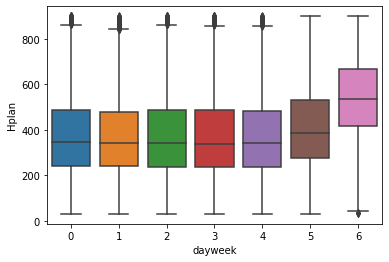

In [175]:
#plt.boxplot(routeHplan['Hplan'])
#plt.show()
ax = sns.boxplot(x=routeHplan['dayweek'], y=routeHplan['Hplan'])

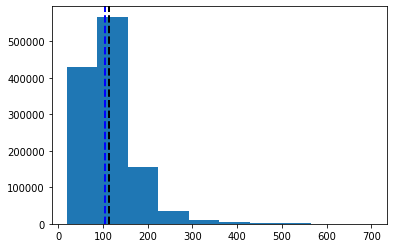

Média:  114.56543995972733  |  Desvio Padrão:  60.73419424282447  |  Mediana:  104.05667081483261


In [176]:
# o corte foi realizado pegando o menor link e multiplicando pela velocidade 50km/h e o maior link pela velocidade de 5km/h
route = route[((route['ltt'] >= 20) & (route['ltt'] <= 700))]
histr = route.nlargest(50, ['ltt'])
plt.hist(route['ltt'], bins = 10)
plt.axvline(route['ltt'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(route['ltt'].median(), color='b', linestyle='dashed', linewidth=2)
plt.show()
print("Média: ", route['ltt'].mean(), ' | ',"Desvio Padrão: ",route['ltt'].std(), ' | ',"Mediana: ",route['ltt'].median())

In [177]:
route[route['link'] == '(14997, 14998)'].head()

,_id,aproxlinkstart,link,ltt,travel_id,trip_id,dayweek,new_date,new_time,headway
3350,5c76efc1bd8143570fff744c,2017-01-02 04:13:33.493,"(14997, 14998)",37.905094,94,675K-10-0,0,2017-01-02,04:13:33.493000,13384.623
3357,5c76efc1bd8143570fff744d,2017-01-02 04:18:51.533,"(14997, 14998)",60.434665,95,675K-10-0,0,2017-01-02,04:18:51.533000,318.040
3369,5c76efc1bd8143570fff744e,2017-01-02 04:23:02.648,"(14997, 14998)",62.123522,96,675K-10-0,0,2017-01-02,04:23:02.648000,251.115
3385,5c76efc1bd8143570fff744f,2017-01-02 04:28:57.695,"(14997, 14998)",75.248262,97,675K-10-0,0,2017-01-02,04:28:57.695000,355.047
3409,5c76efc1bd8143570fff7450,2017-01-02 04:35:55.769,"(14997, 14998)",46.104994,98,675K-10-0,0,2017-01-02,04:35:55.769000,418.074


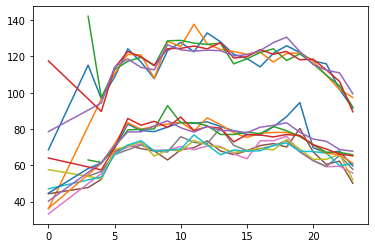

In [133]:
plt.plot(route_mean.loc[('(16066, 14997)', 0),:]['ltt'])
plt.plot(route_mean.loc[('(16066, 14997)', 1),:]['ltt'])
plt.plot(route_mean.loc[('(16066, 14997)', 2),:]['ltt'])
plt.plot(route_mean.loc[('(16066, 14997)', 3),:]['ltt'])
plt.plot(route_mean.loc[('(16066, 14997)', 4),:]['ltt'])
plt.plot(route_mean.loc[('(14997, 14998)', 0),:]['ltt'])
plt.plot(route_mean.loc[('(14997, 14998)', 1),:]['ltt'])
plt.plot(route_mean.loc[('(14997, 14998)', 2),:]['ltt'])
plt.plot(route_mean.loc[('(14997, 14998)', 3),:]['ltt'])
plt.plot(route_mean.loc[('(14997, 14998)', 4),:]['ltt'])
plt.plot(route_mean.loc[('(14998, 14999)', 0),:]['ltt'])
plt.plot(route_mean.loc[('(14998, 14999)', 1),:]['ltt'])
plt.plot(route_mean.loc[('(14998, 14999)', 2),:]['ltt'])
plt.plot(route_mean.loc[('(14998, 14999)', 3),:]['ltt'])
plt.plot(route_mean.loc[('(14998, 14999)', 4),:]['ltt'])
plt.show()

In [199]:
routeHplan['hour'] = routeHplan['aproxlinkstart'].dt.hour
routeHplan.head()

,travel_id,aproxlinkstart,dayweek,new_time,Hplan,hour
3353,95,2017-01-02 04:16:22,0,04:16:22,400.0,4
3362,96,2017-01-02 04:20:41,0,04:20:41,259.0,4
3376,97,2017-01-02 04:26:30,0,04:26:30,349.0,4
3399,98,2017-01-02 04:33:07,0,04:33:07,397.0,4
3411,99,2017-01-02 04:36:33,0,04:36:33,206.0,4


53.40762668872512

In [214]:
#for i in mid_points:
#for i in range(4,22):
#route_mean.head(18)

#for link in mid_points:
#    for i in range(7):
#        for j in range(4,22):
#            print(route_mean.loc[(link, i, j),:]['ltt'])
route['hour'] = route['aproxlinkstart'].dt.hour

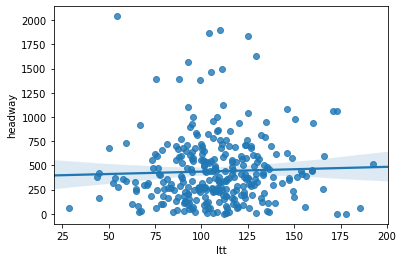

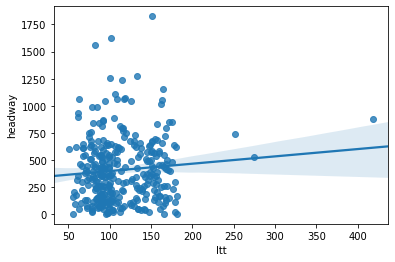

In [255]:
teste_sp = route[(route['hour']== 12) & (route['link'] == '(14697, 14698)') & (route['dayweek']== 1)]
teste_sp = teste_sp[((teste_sp['ltt'] >= 20) & (teste_sp['ltt'] <= 700))]
sns.regplot(teste_sp['ltt'], teste_sp['headway'])
plt.show()

teste_sp = route[(route['hour']== 13) & (route['link'] == '(14697, 14698)') & (route['dayweek']== 1)]
teste_sp = teste_sp[((teste_sp['ltt'] >= 20) & (teste_sp['ltt'] <= 700))]
sns.regplot(teste_sp['ltt'], teste_sp['headway'])
plt.show()

In [237]:
teste_sp['ltt'].max()

312.00698770454983

In [130]:
mid_points

NameError: name 'mid_points' is not defined

In [790]:
route_std.loc[('(12498, 12499)', 6),:]

,ltt,travel_id,headway
aproxlinkstart,,,
4,17.242833,10701.578054,460.905845
5,27.812333,11223.240324,6723.331613
6,23.221064,10724.823050,2082.553417
7,23.428492,10973.755080,368.481202
8,22.803589,10932.415914,459.370004
9,23.746501,10856.815790,449.247029
10,25.147626,11137.547497,434.362324
11,24.756435,10739.298269,471.455029
12,30.008601,11300.315654,437.901544


In [562]:
#route_in = route.set_index(['link', 'dayweek','aproxlinkstart'])

#route_grouped = route_grouped.mean()
#route_g = route_in.groupby(pd.Grouper(freq='H', level = 2)).mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [561]:
route_f = route_in.loc['(18032, 16066)'].dropna()
route_g = route_f.groupby(['link', pd.Grouper(key = 'aproxlinkstart',freq='H')])['ltt'].mean()
route_g
#df.groupby(['name', pd.Grouper(key='date', freq='M')])['ext price'].sum()

KeyError: 'link'

In [513]:
route_grouped.head()

ltt  travel_id  headway
link           dayweek aproxlinkstart                                        
(12498, 12499) 0       2017-01-02 04:49:25.591  94.630066       94.0    0.077
                       2017-01-02 04:54:58.950  75.734139       95.0   34.760
                       2017-01-02 05:07:58.230  67.605478       97.0   22.547
                       2017-01-02 05:15:44.035  54.250813       98.0   16.558
                       2017-01-02 05:16:01.731  71.301719       99.0    7.248

In [527]:
route_g.iloc[0,2]

15.401446153846157

In [502]:
route_grouped = route_grouped.groupby([pd.Grouper(freq='H', level=-1)])

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [468]:
route_grouped.loc['(12498, 12499)']

,ltt,travel_id,headway
dayweek,,,
0,109.745959,19617.669438,11.475082
1,111.047540,19494.484521,15.216139
2,113.979932,20249.124768,11.407463
3,111.853367,19004.206664,11.583102
4,111.328949,19510.243592,11.446517
5,81.926496,20116.156678,12.816368
6,74.269938,19432.529730,18.195003


In [365]:
teste = route[route['link'] == '(18032, 16066)']
teste2 = teste[teste['headway']>=600]
#teste2['headway'].min()


In [366]:
teste2['new_date'].nunique()

245

In [370]:
duplicate = teste2[teste2.duplicated(['new_date'])]
duplicate

,_id,aproxlinkstart,link,ltt,travel_id,trip_id,dayweek,headway,new_date,new_time
339458,5c76efc0bd8143570ffe684d,2017-03-15 09:44:01,"(18032, 16066)",144.164835,9431,675K-10-0,2,1075.132,2017-03-15,09:44:01
432576,5c76efc0bd8143570ffe7267,2017-04-01 04:26:37,"(18032, 16066)",95.793777,12017,675K-10-0,5,642.194,2017-04-01,04:26:37
495817,5c76efc0bd8143570ffe7944,2017-04-13 04:24:52,"(18032, 16066)",125.474888,13774,675K-10-0,3,822.094,2017-04-13,04:24:52
673648,5c76efc0bd8143570ffe8c90,2017-05-18 04:21:32,"(18032, 16066)",60.001457,18714,675K-10-0,3,652.645,2017-05-18,04:21:32
754668,5c76efc0bd8143570ffe955a,2017-06-02 07:37:46,"(18032, 16066)",135.483762,20964,675K-10-0,4,6376.607,2017-06-02,07:37:46
792000,5c76efc0bd8143570ffe9967,2017-06-09 05:21:28,"(18032, 16066)",95.688384,22001,675K-10-0,4,4463.138,2017-06-09,05:21:28
836424,5c76efc0bd8143570ffe9e39,2017-06-17 21:01:39,"(18032, 16066)",104.026175,23235,675K-10-0,5,652.204,2017-06-17,21:01:39


In [139]:
route[(route['aproxlinkstart'] >= '2017-05-02 04:00:00') & (route['aproxlinkstart'] <= '2017-05-02 22:00:00') & (route['link'] == '(18032, 16066)')]

,_id,aproxlinkstart,link,ltt,travel_id,trip_id,dayweek,headway
587196,5c76efc0bd8143570ffe832e,2017-05-02 04:10:53,"(18032, 16066)",35.167562,16312,675K-10-0,1,11344.990
587209,5c76efc0bd8143570ffe832f,2017-05-02 04:21:46,"(18032, 16066)",80.460363,16313,675K-10-0,1,28.183
587214,5c76efc0bd8143570ffe8330,2017-05-02 04:25:19,"(18032, 16066)",57.644096,16314,675K-10-0,1,9.121
587225,5c76efc0bd8143570ffe8331,2017-05-02 04:29:36,"(18032, 16066)",77.556789,16315,675K-10-0,1,7.451
587250,5c76efc0bd8143570ffe8332,2017-05-02 04:36:52,"(18032, 16066)",95.793777,16316,675K-10-0,1,36.443
587264,5c76efc0bd8143570ffe8333,2017-05-02 04:40:16,"(18032, 16066)",73.472926,16317,675K-10-0,1,0.114
587292,5c76efc0bd8143570ffe8334,2017-05-02 04:46:50,"(18032, 16066)",95.793777,16318,675K-10-0,1,15.155
587310,5c76efc0bd8143570ffe8335,2017-05-02 04:50:35,"(18032, 16066)",77.030665,16319,675K-10-0,1,8.637
587372,5c76efc0bd8143570ffe8336,2017-05-02 05:01:13,"(18032, 16066)",85.980749,16320,675K-10-0,1,0.150
587388,5c76efc0bd8143570ffe8337,2017-05-02 05:04:38,"(18032, 16066)",112.830818,16321,675K-10-0,1,8.884


In [88]:
teste = route.groupby(['travel_id'], as_index = True).ltt.sum()
teste_m = route.groupby(['travel_id'], as_index = True).ltt.mean()

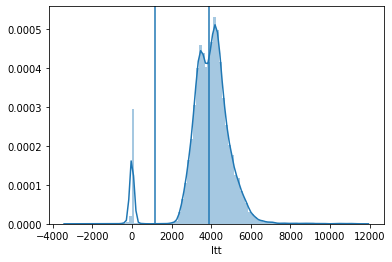

In [93]:
sns.distplot(teste, 100)
plt.axvline(teste.mean())
plt.axvline(teste.std())

In [119]:
teste.mean()

3868.769516561824

In [198]:
# Cálculo dos betas
c[(c['aproxlinkstart'] >= '2017-05-02 04:00:00') & (c['aproxlinkstart'] <= '2017-05-02 22:00:00') & (c['link'] == '(18032, 16066)')]

,_id,aproxlinkstart,link,ltt,travel_id,trip_id,headway
0,5c76efc0bd8143570ffe832e,2017-05-02 04:10:53,"(18032, 16066)",35.167562,16312,675K-10-0,0
1,5c76efc0bd8143570ffe832f,2017-05-02 04:21:46,"(18032, 16066)",80.460363,16313,675K-10-0,653
2,5c76efc0bd8143570ffe8330,2017-05-02 04:25:19,"(18032, 16066)",57.644096,16314,675K-10-0,213
3,5c76efc0bd8143570ffe8331,2017-05-02 04:29:36,"(18032, 16066)",77.556789,16315,675K-10-0,257
4,5c76efc0bd8143570ffe8332,2017-05-02 04:36:52,"(18032, 16066)",95.793777,16316,675K-10-0,436
5,5c76efc0bd8143570ffe8333,2017-05-02 04:40:16,"(18032, 16066)",73.472926,16317,675K-10-0,204
6,5c76efc0bd8143570ffe8334,2017-05-02 04:46:50,"(18032, 16066)",95.793777,16318,675K-10-0,394
7,5c76efc0bd8143570ffe8335,2017-05-02 04:50:35,"(18032, 16066)",77.030665,16319,675K-10-0,225
8,5c76efc0bd8143570ffe8336,2017-05-02 05:01:13,"(18032, 16066)",85.980749,16320,675K-10-0,638
9,5c76efc0bd8143570ffe8337,2017-05-02 05:04:38,"(18032, 16066)",112.830818,16321,675K-10-0,205


In [51]:
linhas = pd.read_csv('shape.txt')
paradas = pd.read_csv('stops.txt')
viagem = pd.read_csv('trips.txt')

In [46]:
linhas.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,63442,-23.432172,-46.787096,1,0.000000
1,63442,-23.432116,-46.787105,2,6.269753
2,63442,-23.431590,-46.787191,3,65.183495
3,63442,-23.431476,-46.787206,4,77.901642
4,63442,-23.431429,-46.787211,5,83.131508


In [48]:
paradas.head()

,stop_id,stop_name,stop_desc,stop_lat,stop_lon
0,18848,Clínicas,NaN,-23.554190,-46.670723
1,18849,Vila Madalena,NaN,-23.546720,-46.690738
2,18850,Consolação,NaN,-23.557503,-46.660870
3,18851,Conceição,NaN,-23.636214,-46.641141
4,18852,Jabaquara,NaN,-23.645754,-46.642084


In [56]:
viagem.head()
viagem[viagem['route_id']=='675K-10']

,route_id,service_id,trip_id,trip_headsign,direction_id,shape_id
1408,675K-10,USD,675K-10-0,Metrô Sta. Cruz,0,54897
1409,675K-10,USD,675K-10-1,Term. Jd. âNgela,1,60424


In [86]:
l675 = linhas[linhas['shape_id']==54897]
l675.tail()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
495510,54897,-23.598668,-46.637561,343,19587.770
495511,54897,-23.598984,-46.637565,344,19622.770
495512,54897,-23.599110,-46.637566,345,19636.725
495513,54897,-23.599304,-46.637569,346,19658.213
495514,54897,-23.599410,-46.637570,347,19669.953


In [131]:
from geo import circle_dist

w = circle_dist(-23.689609733095438, -46.77345727770849, -23.68628318749556, -46.77055481875523)
print(w)
x = circle_dist(-23.690466, -46.773692, -23.690568, -46.773793)
y = circle_dist(-23.690568, -46.773793, -23.690627,-46.773852)
z = circle_dist(-23.690627,-46.773852, -23.690715,-46.773940)
(x + y + z)*1000 - 37.421383

0.4736149482280331


0.06388595317123702

In [82]:
dist = circle_dist(l675['shape_pt_lat'], l675['shape_pt_lon'], l675['shape_pt_lat'].shift(), l675['shape_pt_lon'].shift())

In [89]:
dist.sum()*1000

19689.30187855746

In [93]:
((dist.sum() - 19.669953)/40)*3600

1.7413990701716031

In [108]:
%time
a = querylist1('675K-10-0', 3)
%time
a.head()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


,_id,aproxlinkstart,link,ltt,travel_id,trip_id,headway
0,5c76efc0bd8143570ffe5fc5,2017-03-01 04:10:42,"(18032, 16066)",88.305676,7247,675K-10-0,NaT
1,5c76efc0bd8143570ffe5fc6,2017-03-01 04:16:16,"(18032, 16066)",56.873849,7248,675K-10-0,00:05:34
2,5c76efc0bd8143570ffe5fc7,2017-03-01 04:21:09,"(18032, 16066)",54.405060,7249,675K-10-0,00:04:53
3,5c76efc0bd8143570ffe5fc8,2017-03-01 04:25:52,"(18032, 16066)",80.610608,7250,675K-10-0,00:04:43
4,5c76efc0bd8143570ffe5fc9,2017-03-01 04:31:22,"(18032, 16066)",78.276444,7251,675K-10-0,00:05:30


In [214]:
alpha = c.loc[0]
alpha[alpha['link']== '(18032, 16066)']

,_id,aproxlinkstart,link,ltt,travel_id,trip_id,headway
0,5c76efc0bd8143570ffe82c5,2017-05-01 04:16:53,"(18032, 16066)",87.123630,16207,675K-10-0,0
0,5c76efc0bd8143570ffe832e,2017-05-02 04:10:53,"(18032, 16066)",35.167562,16312,675K-10-0,0
0,5c76efc0bd8143570ffe83ce,2017-05-03 04:10:38,"(18032, 16066)",78.076446,16472,675K-10-0,0
0,5c76efc0bd8143570ffe8474,2017-05-04 04:13:00,"(18032, 16066)",89.415714,16638,675K-10-0,0
0,5c76efc0bd8143570ffe8525,2017-05-05 04:11:52,"(18032, 16066)",95.793777,16815,675K-10-0,0


## __Referências__


https://linux.ime.usp.br/~andreky/AndreYai_monografia_revisada.pdf

[A headway-based approach to eliminate bus bunching: Systematic analysis and comparisons - Carlos Daganzo]

https://www.sciencedirect.com/science/article/pii/S0191261509000484

[Dados abertos SPTrans]

https://www.prefeitura.sp.gov.br/cidade/secretarias/transportes/institucional/sptrans/acesso_a_informacao/index.php?p=228269

[Edital Prefeitura de SP 2018]

https://www.prefeitura.sp.gov.br/cidade/secretarias/transportes/edital/index.php?p=268507

## __Cursos e Tutoriais__

https://towardsdatascience.com/data-visualization-with-python-folium-maps-a74231de9ef7

https://uci.service-now.com/kb_view.do?sysparm_article=KB0010201

In [740]:
(0.2882771770359505/50)*3600

20.755956746588435

In [721]:
60/18

3.3333333333333335

In [741]:
(0.53544/50)*3600

38.551680000000005

In [730]:
6*36

216

In [739]:
(19/50)*3600

1368.0

In [749]:
(1400000-1212050)/1400000

0.13425

In [147]:
with open('edgeslines.pkl', 'rb') as input_file:
    edge = pickle.load(input_file)

In [ ]:
teste = route['new_date'].unique().tolist()

export_csv = route.to_csv (r'/home/diluisi/Documentos/Doutorado/Codigo/export_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

#route.sort_values(['travel_id','aproxlinkstart']).head(36)